# Yelp Data Challenge


<b>Topic:</b>  Restaurants Survival Strategy <br>
<b>Author:</b>  Tai-Hua Chung <br>
<b>Date:</b>   2019-03-20 <br>


In [2]:
import pandas as pd
import json
#import ast
import numpy as np
import re
#import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from IPython.display import display
pd.options.display.max_columns = None

In [4]:
# print all the outputs in a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [5]:
# Just in case
from pandas.io.json import json_normalize

In [6]:
import warnings
warnings.filterwarnings('ignore')

<b>Table of Content:</b>

<ol><b>1. Data Preparation:</b> import json data files <i>(Business, Reviews, and User)</i>, clean and merge into data table for following analysis.</ol>
<ol><b>2. Feature Engineering:</b> create more variables for analysis.</ol> 
<ol><b>3. Preliminary Analysis:</b> descriptive statistics and findings summary.</ol>
<ol><b>4. Machine Learning & Validation:</b> decision trees and validation results.</ol>
<ol><b>5. Managerial Insights:</b> insights summary and recommendations.</ol>

# 1. Data Preparation

## Business data (json)

<strong> business_id </strong>- 22 character unique string business id <br> 
<strong>name </strong>- the name of business <br>
<strong>address </strong>- full address of the business <br>
<strong>city </strong>- string of the city "San Francisco" <br>
<strong>state</strong> - "CA", "NY"   <br>
<strong>postal code</strong> - "94107" <br>
<strong>latitude</strong> - 37.7817529521 <br>
<strong>longitude</strong> - -122.39612197<br>
<strong>stars</strong> - 4.5, star rating, rounded to half-stars <br>
<strong>review_count</strong> - integer, number of reviews <br>
<strong>is_open</strong> - 1, 0 or 1 for closed or open, respectively <br> 

<strong>attributes</strong>: dictionary of business attributes with nested dictionaries within attributes. <br> 
 {"RestaurantsTakeOut": true, <br>
       "BusinessParking": {<br>
           "garage": false,<br>
           "street": true,<br>
           "validated": false,<br>
           "lot": false,<br>
           "valet": false},}, <br>

<strong>categories</strong> - an array of strings of business categories <br>
   "categories": [ <br>
       "Mexican", <br>
       "Burgers", <br>
       "Gastropubs"], <br>
       
<strong> hours </strong>- Dictionary of day and hours open <br> 
{       "Monday": "10:00-21:00", <br>
       "Tuesday": "10:00-21:00", <br>
       "Friday": "10:00-21:00", <br>
       "Saturday": "10:00-21:00" } <br>

In [6]:
with open('business.json', encoding = 'utf8') as f:
    dict_business = [json.loads(line) for line in f]
    
df = pd.DataFrame.from_dict(dict_business)

In [7]:
df.head(3)

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,postal_code,review_count,stars,state
0,2818 E Camino Acequia Drive,{'GoodForKids': 'False'},1SWheh84yJXfytovILXOAQ,"Golf, Active Life",Phoenix,None,0,33.522143,-112.018481,Arizona Biltmore Golf Club,85016,5,3.0,AZ
1,30 Eglinton Avenue W,"{'RestaurantsReservations': 'True', 'GoodForMe...",QXAEGFB4oINsVuTFxEYKFQ,"Specialty Food, Restaurants, Dim Sum, Imported...",Mississauga,"{'Monday': '9:0-0:0', 'Tuesday': '9:0-0:0', 'W...",1,43.605499,-79.652289,Emerald Chinese Restaurant,L5R 3E7,128,2.5,ON
2,"10110 Johnston Rd, Ste 15","{'GoodForKids': 'True', 'NoiseLevel': 'u'avera...",gnKjwL_1w79qoiV3IC_xQQ,"Sushi Bars, Restaurants, Japanese",Charlotte,"{'Monday': '17:30-21:30', 'Wednesday': '17:30-...",1,35.092564,-80.859132,Musashi Japanese Restaurant,28210,170,4.0,NC


In [ ]:
df = pd.concat([df.drop(['attributes','hours'], axis=1), \
                          df['hours'].apply(pd.Series), \
                          df['attributes'].apply(pd.Series) \
                         ], axis=1)

Create new columns for each BusinessParking attribute

In [ ]:
df['garage'] = df.BusinessParking.str.match('.*\'garage\': True,.*')*1
df['street'] = df.BusinessParking.str.match('.*\'street\': True,.*')*1
df['validated'] = df.BusinessParking.str.match('.*\'validated\': True,.*')*1
df['lot'] = df.BusinessParking.str.match('.*\'lot\': True,.*')*1
df['valet'] = df.BusinessParking.str.match('.*\'valet\': True,.*')*1

Create new columns for each GoodForMeal attribute

In [ ]:
df['dessert'] = df.GoodForMeal.str.match('.*\'dessert\': True,.*')*1
df['latenight'] = df.GoodForMeal.str.match('.*\'latenight\': True,.*')*1
df['lunch'] = df.GoodForMeal.str.match('.*\'lunch\': True,.*')*1
df['dinner'] = df.GoodForMeal.str.match('.*\'dinner\': True,.*')*1
df['brunch'] = df.GoodForMeal.str.match('.*\'brunch\': True,.*')*1
df['breakfast'] = df.GoodForMeal.str.match('.*\'breakfast\': True,.*')*1

Create new columns for each Ambience attribute

In [ ]:
df['romantic'] = df.Ambience.str.match('.*\'romantic\': True,.*')*1
df['intimate'] = df.Ambience.str.match('.*\'intimate\': True,.*')*1
df['classy'] = df.Ambience.str.match('.*\'classy\': True,.*')*1
df['hipster'] = df.Ambience.str.match('.*\'hipster\': True,.*')*1
df['divey'] = df.Ambience.str.match('.*\'divey\': True,.*')*1
df['touristy'] = df.Ambience.str.match('.*\'touristy\': True,.*')*1
df['trendy'] = df.Ambience.str.match('.*\'trendy\': True,.*')*1
df['upscale'] = df.Ambience.str.match('.*\'upscale\': True,.*')*1
df['casual'] = df.Ambience.str.match('.*\'casual\': True,.*')*1

Convert days to boolean type

In [ ]:
df['open_Monday'] = df.Monday.notna() * 1
df['open_Tuesday'] = df.Tuesday.notna() * 1
df['open_Wednesday'] = df.Wednesday.notna() * 1
df['open_Thursday'] = df.Thursday.notna() * 1
df['open_Friday'] = df.Friday.notna() * 1
df['open_Saturday'] = df.Saturday.notna() * 1
df['open_Sunday'] = df.Sunday.notna() * 1

df = df.drop(columns = ['Monday','Tuesday','Wednesday','Thursday','Friday',\
                       'Saturday','Sunday'])

Cleanup of json objects

In [1]:
#df = df.drop(columns = ['BusinessParking','GoodForMeal','Ambience'])

In [ ]:
df['AgesAllowed'] = df['AgesAllowed'].str.replace('u\'','').str.replace('\'','')
df['Alcohol'] = df['Alcohol'].str.replace('u\'','').str.replace('\'','')
df['BYOB'] = df['BYOB'].str.replace('u\'','').str.replace('\'','')
df['BYOBCorkage'] = df['BYOBCorkage'].str.replace('u\'','').str.replace('\'','')
df['BestNights'] = df['BestNights'].str.replace('u\'','').str.replace('\'','')
df['BikeParking'] = df['BikeParking'].str.replace('u\'','').str.replace('\'','')
df['BusinessAcceptsBitcoin'] = df['BusinessAcceptsBitcoin'].str.replace('u\'','').str.replace('\'','')
df['BusinessAcceptsCreditCards'] = df['BusinessAcceptsCreditCards'].str.replace('u\'','').str.replace('\'','')
df['Caters'] = df['Caters'].str.replace('u\'','').str.replace('\'','')
df['DogsAllowed'] = df['DogsAllowed'].str.replace('u\'','').str.replace('\'','')
df['DriveThru'] = df['DriveThru'].str.replace('u\'','').str.replace('\'','')
df['GoodForKids'] = df['GoodForKids'].str.replace('u\'','').str.replace('\'','')
df['WiFi'] = df['WiFi'].str.replace('u\'','').str.replace('\'','')
df['RestaurantsAttire'] = df['RestaurantsAttire'].str.replace('u\'','').str.replace('\'','')
df['NoiseLevel'] = df['NoiseLevel'].str.replace('u\'','').str.replace('\'','')

Turn columns numeric

In [ ]:
df['RestaurantsDelivery'] = df.RestaurantsDelivery.str.match('.*True.*') * 1 +\
                            df.RestaurantsDelivery.str.match('.*False.*') * 0 +\
                            df.RestaurantsDelivery.str.match('.*None.*') * 0

df['RestaurantsReservations'] = df.RestaurantsReservations.str.match('.*True.*') * 1 +\
                                df.RestaurantsReservations.str.match('.*False.*') * 0 +\
                                df.RestaurantsReservations.str.match('.*None.*') * 0

df['GoodForKids'] = df.GoodForKids.str.match('.*True.*') * 1 +\
                                df.GoodForKids.str.match('.*False.*') * 0 +\
                                df.GoodForKids.str.match('.*None.*') * 0

df['HappyHour'] = df.HappyHour.str.match('.*True.*') * 1 +\
                                df.HappyHour.str.match('.*False.*') * 0 +\
                                df.HappyHour.str.match('.*None.*') * 0

df['RestaurantsTableService'] = df.RestaurantsTableService.str.match('.*True.*') * 1 +\
                                df.RestaurantsTableService.str.match('.*False.*') * 0 +\
                                df.RestaurantsTableService.str.match('.*None.*') * 0

df['DriveThru'] = df.DriveThru.str.match('.*True.*') * 1 +\
                                df.DriveThru.str.match('.*False.*') * 0 +\
                                df.DriveThru.str.match('.*None.*') * 0

df['RestaurantsTakeOut'] = df.RestaurantsTakeOut.str.match('.*True.*') * 1 +\
                                df.RestaurantsTakeOut.str.match('.*False.*') * 0 +\
                                df.RestaurantsTakeOut.str.match('.*None.*') * 0

df['Open24Hours'] = df.Open24Hours.str.match('.*True.*') * 1 +\
                                df.Open24Hours.str.match('.*False.*') * 0 +\
                                df.Open24Hours.str.match('.*None.*') * 0

df['RestaurantsTakeOut'] = df.RestaurantsTakeOut.str.match('.*True.*') * 1 +\
                                df.RestaurantsTakeOut.str.match('.*False.*') * 0 +\
                                df.RestaurantsTakeOut.str.match('.*None.*') * 0

df['BYOBCorkage'] = df.BYOBCorkage.str.match('.*yes.*') * 1 +\
                                df.BYOBCorkage.str.match('.*no.*') * 0 +\
                                df.BYOBCorkage.str.match('.*None.*') * 0

df['Alcohol'] = df.Alcohol.str.match('.*bar.*') * 1 +\
                                df.Alcohol.str.match('.*beer.*') * 0.5 +\
                                df.Alcohol.str.match('.*one.*') * 0

df['RestaurantsAttire'] = df.RestaurantsAttire.str.match('.*formal.*') * 1 +\
                                df.RestaurantsAttire.str.match('.*dressy.*') * 1 +\
                                df.RestaurantsAttire.str.match('.*casual.*') * 0 +\
                                df.RestaurantsAttire.str.match('.*one.*') * 0

df['RestaurantsGoodForGroups'] = df.RestaurantsGoodForGroups.str.match('.*True.*') * 1 +\
                                 df.RestaurantsGoodForGroups.str.match('.*False.*') * 0 +\
                                 df.RestaurantsGoodForGroups.str.match('.*None.*') * 0

df['NoiseLevel'] = df.NoiseLevel.str.match('.*very_.*') * 4 +\
                   df.NoiseLevel.str.match('.*loud.*') * 3 +\
                   df.NoiseLevel.str.match('.*average.*') * 2 +\
                   df.NoiseLevel.str.match('.*quiet.*') * 1 +\
                   df.NoiseLevel.str.match('.*None.*') * 0

df['WiFi'] = df.WiFi.str.match('.*paid.*') * 3 +\
             df.WiFi.str.match('.*free.*') * 2 +\
             df.WiFi.str.match('.*no.*') * 1 +\
             df.WiFi.str.match('.*None.*') * 0

### Regex to create dummy columns containing 

#### Dining_F

In [ ]:
df['categories_adj'] = ['None' if i is None else i for i in df.categories]

In [ ]:
import collections
collections.Counter(" ".join(df["categories_adj"]).split(',')).most_common(150)

In [ ]:
import re
food = re.compile('Restaurants,|Food,|Bars,|American (Traditional),|Sandwiches,|Fast Food,|Coffee & Tea| \
                  Breakfast & Brunch,|American (New),|Burgers,|Pizza,|Italian,|Desserts,|Cafes,|Bakeries,|Beer,| \
                  Salad,|Mexican,|Chicken Wings,|Chinese,|Seafood,|Japanese,|Ice Cream & Frozen Yogurt,|Delis,| \
                  Asian Fusion,|Lounges,|Canadian (New),|Sushi Bars,|Mediterranean,|Juice Bars & Smoothies,')

In [ ]:
df['dining_F'] = df.categories.apply(lambda x: 1 if re.search(food, str(x)) else 0)

In [ ]:
df.head()

#### Top 100 categories

In [ ]:
catgory_top100 =  pd.Series(''.join(df['categories_adj']).split(',')).value_counts()[:100].index

In [ ]:
for i in catgory_top100:
    df[i] = df.categories.str.contains(i)*1

#### Las Vegas Restaurants


In [ ]:
df.groupby(['city']).size().nlargest(10)

Since Las Vegas has the highest number of businesses, we will subset the data into only Las Vegas restaurants moving forward.

In [ ]:
restaurants = df[(df.city=='Las Vegas') & (df.dining_F ==1)]

In [ ]:
restaurants.head(3)

Import csv of cleaned data.

In [ ]:
restaurants.to_csv('restaurants.csv')

## Review data (json)

<strong> review_id </strong> - 22 character unique string review id, "zdSx_SD6obEhz9VrW9uAWA" <br>
<strong>user_id</strong> - 22 character unique string user id, maps to the user in user.json, "Ha3iJu77CxlrFm-vQRs_8g"  <br>
<strong>business_id </strong>- 22 character business id, maps to business in business.json, "tnhfDv5Il8EaGSXZGiuQGg" <br>
<strong>stars </strong>- integer star rating <br>
<strong>date </strong>- date formatted YYYY-MM-DD, "2016-03-09" <br>
<strong>text </strong>- string of review, "Great place to hang out after work: the prices are decent, and the ambience is fun. It's a bit loud, but very lively. The staff is friendly, and the food is good. They have a good selection of drinks." <br>
<strong>useful </strong>- integer number of useful votes received <br>
<strong>funny </strong>- integer number of funny votes received <br>
<strong>cool </strong>- integer number of cool votes received <br>

In [27]:
#Open Review Dataset
with open('review.json') as f:
    dict_review = [json.loads(line) for line in f]
    
#Convert into Dataframe
df_review = pd.DataFrame.from_dict(dict_review)

{'review_id': 'GJXCdrto3ASJOqKeVWPi6Q',
 'user_id': 'yXQM5uF2jS6es16SJzNHfg',
 'business_id': 'NZnhc2sEQy3RmzKTZnqtwQ',
 'stars': 5.0,
 'useful': 0,
 'funny': 0,
 'cool': 0,
 'text': "I *adore* Travis at the Hard Rock's new Kelly Cardenas Salon!  I'm always a fan of a great blowout and no stranger to the chains that offer this service; however, Travis has taken the flawless blowout to a whole new level!  \n\nTravis's greets you with his perfectly green swoosh in his otherwise perfectly styled black hair and a Vegas-worthy rockstar outfit.  Next comes the most relaxing and incredible shampoo -- where you get a full head message that could cure even the very worst migraine in minutes --- and the scented shampoo room.  Travis has freakishly strong fingers (in a good way) and use the perfect amount of pressure.  That was superb!  Then starts the glorious blowout... where not one, not two, but THREE people were involved in doing the best round-brush action my hair has ever seen.  The team o

In [ ]:
#Convert dataframe into .csv file for further use. 
df_review.to_csv('yelp_review.csv')

df_review = pd.read_csv('yelp_review.csv')

#### Filter Las Vegas reviews

In [29]:
city = restaurants[['business_id','city']]

In [ ]:
df_review = df_review.merge(restaurants, left_on='business_id', right_on='business_id', how='left')

In [ ]:
reviews_part = df_review[(df_review.city=='Las Vegas')]

In [ ]:
#Extract time variables from the date column. 
reviews_part['Year'] = reviews_part.date.astype(np.datetime64).dt.year
reviews_part['Month'] = reviews_part.date.astype(np.datetime64).dt.month
reviews_part['Day'] = reviews_part.date.astype(np.datetime64).dt.day
reviews_part['Hour'] = reviews_part.date.astype(np.datetime64).dt.hour
reviews_part['Minute'] = reviews_part.date.astype(np.datetime64).dt.minute

#Create a new column for text length. 
reviews_part['text_length'] = reviews_part['text'].apply(len) 

In [ ]:
#For Las Vegas Restaurants, create Sentiment Column and use TextBlob package. 
reviews_part['Sentiment'] = testimonial.sentiment.polarity


#Creates an empty array of sentiment values for each text review. 
empty = []
sentiment = pd.Series()
for i in reviews_part.text:
       testimonial = tb(i)
       sentiment.add(testimonial.sentiment.polarity)
       empty.append(testimonial.sentiment.polarity)
        
#While loop with counter to append the sentiment values on their index 
index = 0 
while index < len(reviews_part):
    reviews_part.Sentiment[index] = empty[index]
    index += 1
    print (index) #Prints out counter

In [ ]:
reviews_part.to_csv('reviews_part.csv')

In [ ]:
len(reviews_part)

## User data (json)

<strong> user_id </strong> - 22 character unique user id, maps to the user in user.json, "Ha3iJu77CxlrFm-vQRs_8g",  <br> 
<strong>name </strong>- string of the user's first name, "Sebastien" <br>
<strong>review_count </strong>- integer, the number of reviews they've written, 56 <br> 
<strong>yelping_since </strong>- string, when the user joined Yelp, formatted like YYYY-MM-DD, "2011-01-01" <br> 
<strong>friends </strong>- array of strings, an array of the user's friend as user_ids
["wqoXYLWmpkEH0YvTmHBsJQ",
       "KUXLLiJGrjtSsapmxmpvTA",
       "6e9rJKQC3n0RSKyHLViL-Q" ], <br> 

<strong>useful </strong>- integer, number of useful votes sent by the user <br>
<strong>funny</strong> - integer, number of funny votes sent by the user <br>
<strong>cool </strong>- integer, number of cool votes sent by the user <br>
<strong>fans</strong> - integer, number of fans the user has <br>
<strong>elite </strong>- array of integers, the years the user was elite [
       2012,
       2013
   ],<br>
<strong>average_stars</strong> - 4.31, loat, average rating of all reviews<br>
<strong>compliment_hot</strong> - 339, integer, number of hot compliments received by the user<br>
<strong>compliment_more</strong> - 668, integer, number of more compliments received by the user<br>
<strong>compliment_profile</strong> - 42, integer, number of profile compliments received by the user<br>
<strong>compliment_cute </strong>- 62, integer, number of cute compliments received by the user<br>
<strong>compliment_list</strong> - 37, number of list compliments received by the user<br>
<strong>compliment_note </strong>- 356, number of note compliments received by the user<br>
<strong>compliment_plain </strong>- 68, number of plain compliments received by the user<br>
<strong>compliment_cool</strong> - 91, number of cool compliments received by the user<br>
<strong>compliment_funny</strong> - 99, number of funny compliments received by the user<br>
<strong>compliment_writer</strong> - 95, number of writer compliments received by the user<br>

In [34]:
with open('user.json', encoding = 'utf8') as f:
    dict_user = [json.loads(line) for line in f]
    
df_user = pd.DataFrame.from_dict(dict_user)

In [11]:
df.head(3).T

,0,1,2
average_stars,4.03,3.63,3.71
compliment_cool,1,1,0
compliment_cute,0,0,0
compliment_funny,1,1,0
compliment_hot,2,1,0
compliment_list,0,0,0
compliment_more,0,0,0
compliment_note,1,0,1
compliment_photos,0,0,0
compliment_plain,1,0,0


Drop name column

In [35]:
df_user = df_user.drop(columns = 'name')

Cleanup elite column

In [36]:
df_user['elite'] = df_user.elite.astype(str)

import re

srs = df_user.elite

s = [re.sub(r'(?<=[.,])(?=[^\s])', r' ', line) for line in srs]
elite_srs = pd.Series(s).astype(str)
df_user['elite'] = elite_srs

df2 = df_user.copy()

Change yelping since to datetime data type

In [44]:
df2['yelping_since_yr'] = df2.yelping_since.astype(np.datetime64).dt.year

Extract which years members were Elite Yelpers

In [37]:
df2['elite_year1'] = srs.str.split(',', expand = True)[0]
df2['elite_year2'] = srs.str.split(',', expand = True)[1]
df2['elite_year3'] = srs.str.split(',', expand = True)[2]
df2['elite_year4'] = srs.str.split(',', expand = True)[3]
df2['elite_year5'] = srs.str.split(',', expand = True)[4]
df2['elite_year6'] = srs.str.split(',', expand = True)[5]
df2['elite_year7'] = srs.str.split(',', expand = True)[6]
df2['elite_year8'] = srs.str.split(',', expand = True)[7]
df2['elite_year9'] = srs.str.split(',', expand = True)[8]
df2['elite_year10'] = srs.str.split(',', expand = True)[9]
df2['elite_year11'] = srs.str.split(',', expand = True)[10]
df2['elite_year12'] = srs.str.split(',', expand = True)[11]
df2['elite_year13'] = srs.str.split(',', expand = True)[12]

Create dummy variable for if user was Elite Member at least once

In [45]:
df2['elite_f'] = (df2.elite != '') * 1

Create new column of user's first year as an Elite member

In [39]:
df2['elite_since_yr'] = df2.yelping_since.astype(np.datetime64).dt.year

Calculate number of years it took a user to become Elite

In [46]:
df2['elite_year1'] = pd.to_numeric(df2.elite_year1, downcast='signed')
df2['years_to_elite'] = df2.elite_year1 - df2.yelping_since_yr

df2['elite_since_yr_adj'] = df2['elite_year1']

Calculate total number of votes sent by each member

In [41]:
df2['votes_sent'] = df2.cool + df2.funny + df2.useful

Export csv for user data

In [19]:
df2.to_csv('LV_Users_Cleaned.csv')

In [42]:
df2.head(3)

,average_stars,compliment_cool,compliment_cute,compliment_funny,compliment_hot,compliment_list,compliment_more,compliment_note,compliment_photos,compliment_plain,compliment_profile,compliment_writer,cool,elite,fans,friends,funny,review_count,useful,user_id,yelping_since,elite_year1,elite_year2,elite_year3,elite_year4,elite_year5,elite_year6,elite_year7,elite_year8,elite_year9,elite_year10,elite_year11,elite_year12,elite_year13,elite_dummy,first_year,years_to_elite,votes_sent
0,4.03,1,0,1,2,0,0,1,0,1,0,2,25,"2015, 2016, 2017",5,"c78V-rj8NQcQjOI8KP3UEA, alRMgPcngYSCJ5naFRBz5g...",17,95,84,l6BmjZMeQD3rDxWUbiAiow,2013-10-08 23:11:33,2015.0,2016,2017,None,None,None,None,None,None,None,None,None,None,1,2013,2.0,126
1,3.63,1,0,1,1,0,0,0,0,0,0,0,16,,4,"kEBTgDvFX754S68FllfCaA, aB2DynOxNOJK9st2ZeGTPg...",22,33,48,4XChL029mKr5hydo79Ljxg,2013-02-21 22:29:06,NaN,None,None,None,None,None,None,None,None,None,None,None,None,0,2013,NaN,86
2,3.71,0,0,0,0,0,0,1,0,0,0,0,10,,0,"4N-HU_T32hLENLntsNKNBg, pSY2vwWLgWfGVAAiKQzMng...",8,16,28,bc8C_eETBWL0olvFSJJd0w,2013-10-04 00:16:10,NaN,None,None,None,None,None,None,None,None,None,None,None,None,0,2013,NaN,46


### Merge the data

##### Only run the cell below if you have csv of individual tables

business = pd.read_csv('LV_Restaurants_Cleaned.csv', index_col = 0)
reviews = pd.read_csv('reviews_part.csv', index_col = 0)
users = pd.read_csv('LV_Users_Cleaned.csv', index_col = 0)

In [ ]:
#Merge Las Vegas Businesses with Reviews on business_id. 
reviews_part = reviews_part.merge(restaurants, how = "inner", left_on = "business_id", right_on = "business_id")
#Merge users to first merge1 on user_id. 
reviews_part = reviews_part.merge(df2, how = "inner", left_on = "user_id", right_on = "user_id") 
#Export this second merge of all three tables into a CSV. 
reviews_part.to_csv("yelp_vegas_full_merged_20190319.csv")


In [ ]:
temp = user_part[['user_id','yelping_since_yr','elite_since_yr','elite_since_yr_adj',\
                  'elite_f','fans','average_stars']]

In [ ]:
reviews_part = reviews_part.merge(temp, left_on='user_id', right_on='user_id', how='left')

In [34]:
reviews_part['elite_f_true'] = (reviews_part.year >= reviews_part.elite_since_yr_adj)*1

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [74]:
restaurants.to_csv('restaurants.csv')

In [35]:
reviews_part.to_csv('reviews_part.csv')

# 2. Feature Engineering

### Read cleaned datasets

In [85]:
# Las Vegas restaurant data
restaurants = pd.read_csv('restaurants.csv', index_col = 0, low_memory=False)
# Las Vegas reviews data
reviews_part = pd.read_csv('reviews_part.csv', index_col = 0, low_memory=False)

In [8]:
restaurants.head(1)
reviews_part.head(1)

,address,business_id,categories,city,is_open,latitude,longitude,name,postal_code,review_count,stars,state,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,GoodForKids,RestaurantsReservations,GoodForMeal,BusinessParking,Caters,NoiseLevel,RestaurantsTableService,RestaurantsTakeOut,RestaurantsPriceRange2,OutdoorSeating,BikeParking,Ambience,HasTV,WiFi,Alcohol,RestaurantsAttire,RestaurantsGoodForGroups,RestaurantsDelivery,BusinessAcceptsCreditCards,BusinessAcceptsBitcoin,ByAppointmentOnly,AcceptsInsurance,Music,GoodForDancing,CoatCheck,HappyHour,BestNights,WheelchairAccessible,DogsAllowed,BYOBCorkage,DriveThru,Smoking,AgesAllowed,HairSpecializesIn,Corkage,BYOB,DietaryRestrictions,Open24Hours,RestaurantsCounterService,garage,street,validated,lot,valet,dessert,latenight,lunch,dinner,brunch,breakfast,romantic,intimate,classy,hipster,divey,touristy,trendy,upscale,casual,categories_adj,dining_F,Restaurants,Shopping,Food,Home Services,Health & Medical,Nightlife,Beauty & Spas,Local Services,Bars,Event Planning & Services,Automotive,Active Life,Fashion,Home & Garden,American (Traditional),Sandwiches,Professional Services,Arts & Entertainment,Fast Food,Coffee & Tea,Breakfast & Brunch,Doctors,Specialty Food,Hair Salons,American (New),Burgers,Fitness & Instruction,Hotels & Travel,Real Estate,Pizza,Auto Repair,Hair Removal,Skin Care,Italian,Education,Dentists,Desserts,Women's Clothing,Cafes,Bakeries,Beer,Wine & Spirits,Contractors,Nail Salons,RestaurantsRestaurants,Grocery,General Dentistry,Waxing,Massage,Pets,Salad,Day Spas,Caterers,Mexican,Chicken Wings,Sports Bars,Pet Services,Home Decor,Gyms,Chinese,Mags,Pubs,Cosmetics & Beauty Supply,Flowers & Gifts,Venues & Event Spaces,Accessories,Sporting Goods,Seafood,Cosmetic Dentists,Hotels,Tires,Trainers,Furniture Stores,Hair Stylists,Men's Clothing,Financial Services,Japanese,Arts & Crafts,Ice Cream & Frozen Yogurt,Oil Change Stations,Delis,Eyelash Service,Massage Therapy,Music & Video,Asian Fusion,Lounges,Canadian (New),Specialty Schools,Books,Apartments,Department Stores,Convenience Stores,IT Services & Computer Repair,Electronics,Sushi Bars,Auto Parts & Supplies,Mediterranean,Party & Event Planning,Medical Centers,Juice Bars & Smoothies
1,"1775 E Tropicana Ave, Ste 29",PZ-LZzSlhSe9utkQYU8pFg,"Restaurants, Italian",Las Vegas,0,36.100016,-115.128528,Carluccio's Tivoli Gardens,89119.0,40,4.0,NV,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,True,NaN,"{'garage': False, 'street': False, 'validated'...",True,u'quiet',NaN,True,2,False,NaN,"{'romantic': True, 'intimate': False, 'tourist...",False,u'no',u'full_bar','casual',True,False,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,'no',NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,"Restaurants, Italian",1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,business_id,cool,date,funny,review_id,stars,text,useful,user_id,city,year,month,yelping_since_yr,elite_since_yr,elite_since_yr_adj,elite_f,fans,average_stars,quarter,elite_f_true
0,ujmEBvifdJM6h6RLv4wQIg,0,2013-05-07 04:34:36,1.0,Q1sbwvVQXV2734tPgoKj4Q,1.0,Total bill for this horrible service? Over $8G...,6.0,hG7b0MtEbXx5QzbzE6C_VA,Las Vegas,2013,5,2008.0,NaN,NaN,0.0,0.0,2.0,2,0


### 1) Operating period approximation

In [89]:
# minimum review date
opt_yr = reviews_part.groupby('business_id').agg({'year':'min','date':'min'}).\
reset_index().rename(columns={'year':'open_year','date':'min_date'})

# maximun review date
max_yr = reviews_part.groupby('business_id').agg({'year':'max','date':'max'}).\
reset_index().rename(columns={'year':'max_year', 'date':'max_date'})

# merge into one dataframe
opt_yr = opt_yr.merge(max_yr, left_on='business_id', right_on='business_id', how='left')

# retrieve min/max month & quarter
opt_yr['min_mon'] = opt_yr.min_date.astype(np.datetime64).dt.month
opt_yr['max_mon'] = opt_yr.max_date.astype(np.datetime64).dt.month
opt_yr['min_quarter'] = opt_yr.min_date.astype(np.datetime64).dt.quarter
opt_yr['max_quarter'] = opt_yr.max_date.astype(np.datetime64).dt.quarter

# calculate total operating months
opt_yr['ttl_opt_mon'] = (opt_yr.max_year*12 + opt_yr.max_mon) \
- (opt_yr.open_year*12 + opt_yr.min_mon)

opt_yr.head()

,business_id,open_year,min_date,max_year,max_date,min_mon,max_mon,min_quarter,max_quarter,ttl_opt_mon
0,--9e1ONYQuAa-CB_Rrw7Tw,2005,2005-04-27 23:38:49,2018,2018-11-09 16:15:53,4,11,2,4,163
1,--DdmeR16TRb3LsjG0ejrQ,2012,2012-11-05 18:30:28,2014,2014-12-05 19:32:33,11,12,4,4,25
2,--WsruI0IGEoeRmkErU5Gg,2016,2016-06-13 18:32:30,2017,2017-08-28 17:02:34,6,8,2,3,14
3,--Y7NhBKzLTbNliMUX_wfg,2015,2015-08-04 21:58:52,2018,2018-03-21 18:54:44,8,3,3,1,31
4,--e8PjCNhEz32pprnPhCwQ,2014,2014-06-05 19:44:20,2018,2018-09-12 01:32:58,6,9,2,3,51


In [90]:
# merge into review & restaurant dataframe
reviews_part = reviews_part.merge(opt_yr, left_on ='business_id', right_on='business_id', how='left' )
restaurants = restaurants.merge(opt_yr, left_on ='business_id', right_on='business_id', how='left' )

In [91]:
# calculate quarter before maximun review quarter
reviews_part['QBC'] = ((reviews_part.year*4 + reviews_part.quarter) \
- (reviews_part.max_year*4 + reviews_part.max_quarter)).abs()

# calculate month before maximun review month
reviews_part['MBC'] = ((reviews_part.year*12 + reviews_part.month) \
- (reviews_part.max_year*12 + reviews_part.max_mon)).abs()

# calculate quarter before maximun review quarter
reviews_part['QOB'] = ((reviews_part.year*4 + reviews_part.quarter) \
- (reviews_part.open_year*4 + reviews_part.min_quarter)).abs()

# calculate month before maximun review month
reviews_part['MOB'] = ((reviews_part.year*12 + reviews_part.month) \
- (reviews_part.open_year*12 + reviews_part.min_mon)).abs()

In [12]:
#reviews_part.head(1).T

,0
business_id,ujmEBvifdJM6h6RLv4wQIg
cool,0
date,2013-05-07 04:34:36
funny,1
review_id,Q1sbwvVQXV2734tPgoKj4Q
stars,1
text,Total bill for this horrible service? Over $8G...
useful,6
user_id,hG7b0MtEbXx5QzbzE6C_VA
city,Las Vegas


### 2) Stars scoring segments

In [48]:
#reviews_part.groupby('stars').size()

stars
1.0    301432
2.0    156128
3.0    217103
4.0    419450
5.0    936685
dtype: int64

In [480]:
reviews_part.stars.unique()

array([1., 5., 3., 4., 2.])

In [149]:
# overall stars scoring
reviews_part['star_1'] = (reviews_part.stars == 1)*1
reviews_part['star_2'] = (reviews_part.stars == 2)*1
reviews_part['star_3'] = (reviews_part.stars == 3)*1
reviews_part['star_4'] = (reviews_part.stars == 4)*1
reviews_part['star_5'] = (reviews_part.stars == 5)*1
reviews_part['star_high'] = (reviews_part.stars >= 4)*1
reviews_part['star_low'] = (reviews_part.stars <= 2)*1

# stars scoring by yelp elite members
reviews_part['star_elt_1'] = ((reviews_part.stars == 1) & (reviews_part.elite_f_true == 1))*1
reviews_part['star_elt_2'] = ((reviews_part.stars == 2) & (reviews_part.elite_f_true == 1))*1
reviews_part['star_elt_3'] = ((reviews_part.stars == 3) & (reviews_part.elite_f_true == 1))*1
reviews_part['star_elt_4'] = ((reviews_part.stars == 4) & (reviews_part.elite_f_true == 1))*1
reviews_part['star_elt_5'] = ((reviews_part.stars == 5) & (reviews_part.elite_f_true == 1))*1
reviews_part['star_elt_high'] = ((reviews_part.stars >= 4) & (reviews_part.elite_f_true == 1))*1
reviews_part['star_elt_low'] = ((reviews_part.stars <= 2) & (reviews_part.elite_f_true == 1))*1

### 3) Aggregate review data by quarter

In [151]:
reviews_agg = reviews_part.\
groupby(['business_id','city','year','quarter','open_year','min_quarter', 'max_year','max_quarter','ttl_opt_mon','QBC']).\
agg({'review_id':'size','elite_f_true':'sum','stars':'mean', 
     'star_1':'sum','star_2':'sum','star_3':'sum','star_4':'sum','star_5':'sum','star_high':'sum','star_low':'sum', 
     'star_elt_1':'sum','star_elt_2':'sum','star_elt_3':'sum','star_elt_4':'sum','star_elt_5':'sum',
     'star_elt_high':'sum','star_elt_low':'sum'
    }).\
reset_index().rename(columns={'review_id':'review_cnt','elite_f_true':'elite_cnt','stars':'avg_stars'})

In [51]:
#reviews_agg.head(1).T

,0
business_id,--9e1ONYQuAa-CB_Rrw7Tw
city,Las Vegas
year,2005
quarter,2
open_year,2005
min_quarter,2
max_year,2018
max_quarter,4
ttl_opt_mon,163
QBC,54


#### analyze the impact of star rating on survival rate

In [539]:
reviews_agg = \
reviews_agg.merge(restaurants[['business_id','is_open']],left_on='business_id',right_on='business_id',how='left')

In [540]:
reviews_agg[reviews_agg.is_open==0]

,business_id,city,year,quarter,open_year,min_quarter,max_year,max_quarter,ttl_opt_mon,QBC,review_cnt,elite_cnt,avg_stars,star_1,star_2,star_3,star_4,star_5,star_high,star_low,star_elt_1,star_elt_2,star_elt_3,star_elt_4,star_elt_5,star_elt_high,star_elt_low,pre1_rev_cnt,pre1_rev_cnt_inc,pct_star_1,pct_star_2,pct_star_3,pct_star_4,pct_star_5,pct_star_high,pct_star_low,pre1_star,pre1_star_inc,pre1_pct_star1,pre1_pct_star1_inc,pre1_pct_star2,pre1_pct_star2_inc,pre1_pct_star3,pre1_pct_star3_inc,pre1_pct_star4,pre1_pct_star4_inc,pre1_pct_star5,pre1_pct_star5_inc,pre1_pct_starHigh,pre1_pct_starHigh_inc,pre1_pct_starLow,pre1_pct_starLow_inc,pct_elite,avg_stars_elt,pre1_elt_cnt,pre1_elt_cnt_inc,pct_star_elt_1,pct_star_elt_2,pct_star_elt_3,pct_star_elt_4,pct_star_elt_5,pct_star_elt_high,pct_star_elt_low,pre1_star_elt,pre1_star_elt_inc,pre1_pct_star1_elt,pre1_pct_star1_elt_inc,pre1_pct_star2_elt,pre1_pct_star2_elt_inc,pre1_pct_star3_elt,pre1_pct_star3_elt_inc,pre1_pct_star4_elt,pre1_pct_star4_elt_inc,pre1_pct_star5_elt,pre1_pct_star5_elt_inc,pre1_pct_starHigh_elt,pre1_pct_starHigh_elt_inc,pre1_pct_starLow_elt,pre1_pct_starLow_elt_inc,is_open
88,--q7kSBRb0vWC8lSkXFByA,Las Vegas,2008,2,2008,2,2012,2,50,16,1,0,5.000000,0,0,0,0,1,1,0,0,0,0,0,0,0,0,NaN,NaN,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
89,--q7kSBRb0vWC8lSkXFByA,Las Vegas,2010,2,2008,2,2012,2,50,8,1,0,4.000000,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1.0,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,5.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,-1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
90,--q7kSBRb0vWC8lSkXFByA,Las Vegas,2012,1,2008,2,2012,2,50,1,3,1,4.333333,0,0,0,2,1,3,0,0,0,0,1,0,1,0,1.0,2.0,0.000000,0.000000,0.000000,0.666667,0.333333,1.000000,0.000000,4.000000,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-0.333333,0.000000,0.333333,1.000000,0.000000,0.000000,0.000000,0.333333,1.0,0.0,1.0,0.0,0.000000,0.000000,1.000,0.00,1.000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
91,--q7kSBRb0vWC8lSkXFByA,Las Vegas,2012,2,2008,2,2012,2,50,0,2,0,3.000000,0,1,0,1,0,1,1,0,0,0,0,0,0,0,3.0,-1.0,0.000000,0.500000,0.000000,0.500000,0.000000,0.500000,0.500000,4.333333,-1.333333,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.666667,-0.166667,0.333333,-0.333333,1.000000,-0.500000,0.000000,0.500000,0.000000,NaN,1.0,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,0.0,NaN,0.000000,NaN,0.000000,NaN,1.000,NaN,0.00,NaN,1.000,NaN,0.000000,NaN,0.0
288,-1vfRrlnNnNJ5boOVghMPA,Las Vegas,2013,1,2013,1,2015,3,30,10,7,0,3.571429,0,2,0,4,1,5,2,0,0,0,0,0,0,0,NaN,NaN,0.000000,0.285714,0.000000,0.571429,0.142857,0.714286,0.285714,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
289,-1vfRrlnNnNJ5boOVghMPA,Las Vegas,2013,2,2013,1,2015,3,30,9,9,3,3.444444,1,1,2,3,2,5,2,0,1,2,0,0,0,1,7.0,2.0,0.111111,0.111111,0.222222,0.333333,0.222222,0.555556,0.222222,3.571429,-0.126984,0.000000,0.111111,0.285714,-0.174603,0.000000,0.222222,0.571429,-0.238095,0.142857,0.079365,0.714286,-0.158730,0.285714,-0.063492,0.333333,1.0,0.0,3.0,0.0,0.333333,0.666667,0.000,0.00,0.000,0.333333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
290,-1vfRrlnNnNJ5boOVghMPA,Las Vegas,2013,3,2013,1,2015,3,30,8,12,2,3.083333,3,2,1,3,3,6,5,0,2,0,0,0,0,2,9.0,3.0,0.250000,0.166667,0.083333,0.250000,0.250000,0.500000,0.416667,3.444444,-0.361111,0.111111,0.138889,0.111111,0.055556,0.222222,-0.138889,0.333333,-0.083333,0.222222,0.027778,0.555556,-0.055556,0.222222,0.194444

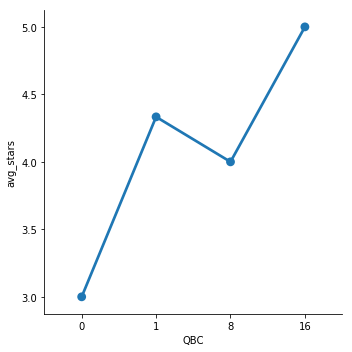

In [541]:
sns.catplot(data=reviews_agg[reviews_agg.business_id=='--q7kSBRb0vWC8lSkXFByA'], \
           x='QBC', y='avg_stars', kind='point')

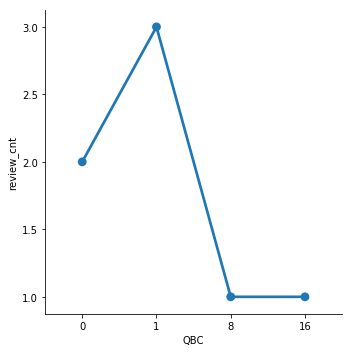

In [542]:
sns.catplot(data=reviews_agg[reviews_agg.business_id=='--q7kSBRb0vWC8lSkXFByA'], \
           x='QBC', y='review_cnt', kind='point')

### 4) Review count related features

Overall

In [157]:
## percent change from previous quarter
# review count increase from previous quarter
reviews_agg['pre1_rev_cnt'] = reviews_agg.groupby(['business_id']).review_cnt.shift(1)
reviews_agg['pre1_rev_cnt_inc'] = reviews_agg['review_cnt'] - reviews_agg['pre1_rev_cnt']

# each stars scoring percentage
reviews_agg['pct_star_1'] = reviews_agg.star_1/ reviews_agg.review_cnt
reviews_agg['pct_star_2'] = reviews_agg.star_2/ reviews_agg.review_cnt
reviews_agg['pct_star_3'] = reviews_agg.star_3/ reviews_agg.review_cnt
reviews_agg['pct_star_4'] = reviews_agg.star_4/ reviews_agg.review_cnt
reviews_agg['pct_star_5'] = reviews_agg.star_5/ reviews_agg.review_cnt
reviews_agg['pct_star_high'] = reviews_agg.star_high/ reviews_agg.review_cnt
reviews_agg['pct_star_low'] = reviews_agg.star_low/ reviews_agg.review_cnt

# overall stars scoring
reviews_agg['pre1_star'] = reviews_agg.groupby(['business_id']).avg_stars.shift(1) 
reviews_agg['pre1_star_inc'] = reviews_agg['avg_stars'] - reviews_agg['pre1_star']
# star 1
reviews_agg['pre1_pct_star1'] = reviews_agg.groupby(['business_id']).pct_star_1.shift(1)
reviews_agg['pre1_pct_star1_inc'] = reviews_agg['pct_star_1'] - reviews_agg['pre1_pct_star1']
# star 2
reviews_agg['pre1_pct_star2'] = reviews_agg.groupby(['business_id']).pct_star_2.shift(1)
reviews_agg['pre1_pct_star2_inc'] = reviews_agg['pct_star_2'] - reviews_agg['pre1_pct_star2']
# star 3
reviews_agg['pre1_pct_star3'] = reviews_agg.groupby(['business_id']).pct_star_3.shift(1)
reviews_agg['pre1_pct_star3_inc'] = reviews_agg['pct_star_3'] - reviews_agg['pre1_pct_star3']
# star 4
reviews_agg['pre1_pct_star4'] = reviews_agg.groupby(['business_id']).pct_star_4.shift(1)
reviews_agg['pre1_pct_star4_inc'] = reviews_agg['pct_star_4'] - reviews_agg['pre1_pct_star4']
# star 5
reviews_agg['pre1_pct_star5'] = reviews_agg.groupby(['business_id']).pct_star_5.shift(1)
reviews_agg['pre1_pct_star5_inc'] = reviews_agg['pct_star_5'] - reviews_agg['pre1_pct_star5']
# high stars (4&5)
reviews_agg['pre1_pct_starHigh'] = reviews_agg.groupby(['business_id']).pct_star_high.shift(1)
reviews_agg['pre1_pct_starHigh_inc'] = reviews_agg['pct_star_high'] - reviews_agg['pre1_pct_starHigh']
# low stars (1&2)
reviews_agg['pre1_pct_starLow'] = reviews_agg.groupby(['business_id']).pct_star_low.shift(1)
reviews_agg['pre1_pct_starLow_inc'] = reviews_agg['pct_star_low'] - reviews_agg['pre1_pct_starLow']


Elite member

In [143]:
reviews_agg.head(1)

,business_id,city,year,quarter,open_year,min_quarter,max_year,max_quarter,ttl_opt_mon,QBC,review_cnt,elite_cnt,avg_stars,star_1,star_2,star_3,star_4,star_5,star_high,star_low,star_elt_1,star_elt_2,star_elt_3,star_elt_4,star_elt_5,star_elt_high,star_elt_low
0,--9e1ONYQuAa-CB_Rrw7Tw,Las Vegas,2005,2,2005,2,2018,4,163,54,1,0,5.0,0,0,0,0,1,1,0,0,0,0,0,0,1,0


In [158]:
# elite review percentage
reviews_agg['pct_elite'] = reviews_agg.elite_cnt/ reviews_agg.review_cnt

# avg. stars scoring
reviews_agg['avg_stars_elt'] = (reviews_agg['star_elt_1'] + reviews_agg['star_elt_2'] + reviews_agg['star_elt_3'] + \
                                reviews_agg['star_elt_4']+ reviews_agg['star_elt_5']) / reviews_agg['elite_cnt']

# review count increase from previous quarter
reviews_agg['pre1_elt_cnt'] = reviews_agg.groupby(['business_id']).elite_cnt.shift(1)
reviews_agg['pre1_elt_cnt_inc'] = reviews_agg['elite_cnt'] - reviews_agg['pre1_elt_cnt']

# each stars scoring percentage
reviews_agg['pct_star_elt_1'] = reviews_agg.star_elt_1/ reviews_agg.elite_cnt
reviews_agg['pct_star_elt_2'] = reviews_agg.star_elt_2/ reviews_agg.elite_cnt
reviews_agg['pct_star_elt_3'] = reviews_agg.star_elt_3/ reviews_agg.elite_cnt
reviews_agg['pct_star_elt_4'] = reviews_agg.star_elt_4/ reviews_agg.elite_cnt
reviews_agg['pct_star_elt_5'] = reviews_agg.star_elt_5/ reviews_agg.elite_cnt
reviews_agg['pct_star_elt_high'] = reviews_agg.star_elt_high/ reviews_agg.elite_cnt
reviews_agg['pct_star_elt_low'] = reviews_agg.star_elt_low/ reviews_agg.elite_cnt

## percent change from previous quarter - elite
# overall stars scoring
reviews_agg['pre1_star_elt'] = reviews_agg.groupby(['business_id']).avg_stars_elt.shift(1) 
reviews_agg['pre1_star_elt_inc'] = reviews_agg['avg_stars_elt'] - reviews_agg['pre1_star_elt']
# star 1
reviews_agg['pre1_pct_star1_elt'] = reviews_agg.groupby(['business_id']).pct_star_elt_1.shift(1)
reviews_agg['pre1_pct_star1_elt_inc'] = reviews_agg['pct_star_elt_1'] - reviews_agg['pre1_pct_star1_elt']
# star 2
reviews_agg['pre1_pct_star2_elt'] = reviews_agg.groupby(['business_id']).pct_star_elt_2.shift(1)
reviews_agg['pre1_pct_star2_elt_inc'] = reviews_agg['pct_star_elt_2'] - reviews_agg['pre1_pct_star2_elt']
# star 3
reviews_agg['pre1_pct_star3_elt'] = reviews_agg.groupby(['business_id']).pct_star_elt_3.shift(1)
reviews_agg['pre1_pct_star3_elt_inc'] = reviews_agg['pct_star_elt_3'] - reviews_agg['pre1_pct_star3_elt']
# star 4
reviews_agg['pre1_pct_star4_elt'] = reviews_agg.groupby(['business_id']).pct_star_elt_4.shift(1)
reviews_agg['pre1_pct_star4_elt_inc'] = reviews_agg['pct_star_elt_4'] - reviews_agg['pre1_pct_star4_elt']
# star 5
reviews_agg['pre1_pct_star5_elt'] = reviews_agg.groupby(['business_id']).pct_star_elt_5.shift(1)
reviews_agg['pre1_pct_star5_elt_inc'] = reviews_agg['pct_star_elt_5'] - reviews_agg['pre1_pct_star5_elt']
# high stars (4&5)
reviews_agg['pre1_pct_starHigh_elt'] = reviews_agg.groupby(['business_id']).pct_star_elt_high.shift(1)
reviews_agg['pre1_pct_starHigh_elt_inc'] = reviews_agg['pct_star_elt_high'] - reviews_agg['pre1_pct_starHigh_elt']
# low stars (1&2)
reviews_agg['pre1_pct_starLow_elt'] = reviews_agg.groupby(['business_id']).pct_star_elt_low.shift(1)
reviews_agg['pre1_pct_starLow_elt_inc'] = reviews_agg['pct_star_elt_low'] - reviews_agg['pre1_pct_starLow_elt']



In [53]:
#reviews_agg.head(1).T

,0
business_id,--9e1ONYQuAa-CB_Rrw7Tw
city,Las Vegas
year,2005
quarter,2
open_year,2005
min_quarter,2
max_year,2018
max_quarter,4
ttl_opt_mon,163
QBC,54


### 5) Select certains attributes for Las Vegas restaurants

In [159]:
#list(restaurants.columns)

['address',
 'business_id',
 'categories',
 'city',
 'is_open',
 'latitude',
 'longitude',
 'name',
 'postal_code',
 'review_count',
 'stars',
 'state',
 'Monday',
 'Tuesday',
 'Wednesday',
 'Thursday',
 'Friday',
 'Saturday',
 'Sunday',
 'GoodForKids',
 'RestaurantsReservations',
 'GoodForMeal',
 'BusinessParking',
 'Caters',
 'NoiseLevel',
 'RestaurantsTableService',
 'RestaurantsTakeOut',
 'RestaurantsPriceRange2',
 'OutdoorSeating',
 'BikeParking',
 'Ambience',
 'HasTV',
 'WiFi',
 'Alcohol',
 'RestaurantsAttire',
 'RestaurantsGoodForGroups',
 'RestaurantsDelivery',
 'BusinessAcceptsCreditCards',
 'BusinessAcceptsBitcoin',
 'ByAppointmentOnly',
 'AcceptsInsurance',
 'Music',
 'GoodForDancing',
 'CoatCheck',
 'HappyHour',
 'BestNights',
 'WheelchairAccessible',
 'DogsAllowed',
 'BYOBCorkage',
 'DriveThru',
 'Smoking',
 'AgesAllowed',
 'HairSpecializesIn',
 'Corkage',
 'BYOB',
 'DietaryRestrictions',
 'Open24Hours',
 'RestaurantsCounterService',
 'garage',
 'street',
 'validated',
 'l

In [807]:
LV = restaurants\
[['business_id','is_open','review_count','stars','ttl_opt_mon',
  'GoodForKids','RestaurantsReservations','RestaurantsTakeOut',
 'RestaurantsPriceRange2','OutdoorSeating','HasTV','RestaurantsGoodForGroups','RestaurantsDelivery',
 'BusinessAcceptsCreditCards','garage','street','validated','lot','valet','romantic','intimate','classy','hipster',
 'divey','touristy','trendy','upscale','casual','dining_F',' Restaurants',' Shopping',#' Food',
 ' Bars',' American (Traditional)',' Sandwiches',' Fast Food',' Coffee & Tea',' Breakfast & Brunch',
 ' Specialty Food',' American (New)',' Burgers',' Pizza',' Italian',' Desserts',' Cafes',' Bakeries',' Beer',
 ' Salad',' Mexican',' Chicken Wings',' Sports Bars',' Chinese',' Seafood',' Japanese',' Ice Cream & Frozen Yogurt',
 ' Asian Fusion',' Lounges',' Canadian (New)',' Sushi Bars',' Mediterranean',' Juice Bars & Smoothies',
]]

In [808]:
from math import floor
LV['opt_yr'] = (LV['ttl_opt_mon']/12).apply(lambda x: 11 if x>=11 else floor(x))

In [809]:
# Deal with None value
LV['GoodForKids'] = LV['GoodForKids'].apply(lambda x: 1 if str(x)=='True' else 0 if str(x)=='False' else 0 if str(x)=='None' else x).astype(float)
LV['RestaurantsReservations'] = LV['RestaurantsReservations'].apply(lambda x: 1 if str(x)=='True' else 0 if str(x)=='False' else 0 if str(x)=='None' else x).astype(float)
LV['RestaurantsTakeOut'] = LV['RestaurantsTakeOut'].apply(lambda x: 1 if str(x)=='True' else 0 if str(x)=='False' else 0 if str(x)=='None' else x).astype(float)
LV['RestaurantsPriceRange2'] = LV['RestaurantsPriceRange2'].apply(lambda x: 1 if str(x)=='True' else 0 if str(x)=='False' else 0 if str(x)=='None' else x).astype(float)
LV['OutdoorSeating'] = LV['OutdoorSeating'].apply(lambda x: 1 if str(x)=='True' else 0 if str(x)=='False' else 0 if str(x)=='None' else x).astype(float)
LV['HasTV'] = LV['HasTV'].apply(lambda x: 1 if str(x)=='True' else 0 if str(x)=='False' else 0 if str(x)=='None' else x).astype(float)
LV['RestaurantsGoodForGroups'] = LV['RestaurantsGoodForGroups'].apply(lambda x: 1 if str(x)=='True' else 0 if str(x)=='False' else 0 if str(x)=='None' else x).astype(float)
LV['RestaurantsDelivery'] = LV['RestaurantsDelivery'].apply(lambda x: 1 if str(x)=='True' else 0 if str(x)=='False' else 0 if str(x)=='None' else x).astype(float)
LV['BusinessAcceptsCreditCards'] = LV['BusinessAcceptsCreditCards'].apply(lambda x: 1 if str(x)=='True' else 0 if str(x)=='False' else 0 if str(x)=='None' else x).astype(float)


In [18]:
LV.head(1)

,business_id,is_open,review_count,stars,ttl_opt_mon,GoodForKids,RestaurantsReservations,RestaurantsTakeOut,RestaurantsPriceRange2,OutdoorSeating,HasTV,RestaurantsGoodForGroups,RestaurantsDelivery,BusinessAcceptsCreditCards,garage,street,validated,lot,valet,romantic,intimate,classy,hipster,divey,touristy,trendy,upscale,casual,dining_F,Restaurants,Shopping,Bars,American (Traditional),Sandwiches,Fast Food,Coffee & Tea,Breakfast & Brunch,Specialty Food,American (New),Burgers,Pizza,Italian,Desserts,Cafes,Bakeries,Beer,Salad,Mexican,Chicken Wings,Sports Bars,Chinese,Seafood,Japanese,Ice Cream & Frozen Yogurt,Asian Fusion,Lounges,Canadian (New),Sushi Bars,Mediterranean,Juice Bars & Smoothies
0,PZ-LZzSlhSe9utkQYU8pFg,0,40,4.0,108,1.0,1.0,1.0,2.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 6) Create lag variables

In [160]:
reviews_agg.columns

Index(['business_id', 'city', 'year', 'quarter', 'open_year', 'min_quarter',
       'max_year', 'max_quarter', 'ttl_opt_mon', 'QBC', 'review_cnt',
       'elite_cnt', 'avg_stars', 'star_1', 'star_2', 'star_3', 'star_4',
       'star_5', 'star_high', 'star_low', 'star_elt_1', 'star_elt_2',
       'star_elt_3', 'star_elt_4', 'star_elt_5', 'star_elt_high',
       'star_elt_low', 'pre1_rev_cnt', 'pre1_rev_cnt_inc', 'pct_star_1',
       'pct_star_2', 'pct_star_3', 'pct_star_4', 'pct_star_5', 'pct_star_high',
       'pct_star_low', 'pre1_star', 'pre1_star_inc', 'pre1_pct_star1',
       'pre1_pct_star1_inc', 'pre1_pct_star2', 'pre1_pct_star2_inc',
       'pre1_pct_star3', 'pre1_pct_star3_inc', 'pre1_pct_star4',
       'pre1_pct_star4_inc', 'pre1_pct_star5', 'pre1_pct_star5_inc',
       'pre1_pct_starHigh', 'pre1_pct_starHigh_inc', 'pre1_pct_starLow',
       'pre1_pct_starLow_inc', 'pct_elite', 'avg_stars_elt', 'pre1_elt_cnt',
       'pre1_elt_cnt_inc', 'pct_star_elt_1', 'pct_star_elt_2',
    

In [810]:
# define needed columns from review dataframe
col_list = ['business_id','review_cnt', \
       'elite_cnt', 'avg_stars', 'star_1', 'star_2', 
       'star_3', 'star_4',
       'star_5', 'star_high', #'star_low', 
       #'star_elt_1', 'star_elt_2',
       'star_elt_3', 'star_elt_4', 'star_elt_5', 'star_elt_high',
       #'star_elt_low', 
       'pre1_rev_cnt_inc', 
       #'pct_star_1',
       #'pct_star_2', 
       'pct_star_3', 'pct_star_4', 'pct_star_5', 
       'pct_star_high',
       #'pct_star_low', 
       'pre1_star_inc',
       #'pre1_pct_star1_inc', 'pre1_pct_star2_inc',
       'pre1_pct_star3_inc',
       'pre1_pct_star4_inc', 'pre1_pct_star5_inc',
       'pre1_pct_starHigh_inc',
       #'pre1_pct_starLow_inc', 
       'pct_elite', 'avg_stars_elt',
       'pre1_elt_cnt_inc', 
       #'pct_star_elt_1', 'pct_star_elt_2',
       'pct_star_elt_3', 'pct_star_elt_4', 'pct_star_elt_5',
       'pct_star_elt_high', #'pct_star_elt_low', 
       'pre1_star_elt_inc', #'pre1_pct_star1_elt_inc',
       #'pre1_pct_star2_elt_inc',
       'pre1_pct_star3_elt_inc', 
       'pre1_pct_star4_elt_inc',
       'pre1_pct_star5_elt_inc',
       'pre1_pct_starHigh_elt_inc',
       #'pre1_pct_starLow_elt_inc'
       ]

In [811]:
# Create lag variables and merge into Las Vegas restaurant dataframe
for i in range(1,2):
    Lag = '_Lag'+str(i)
    temp = reviews_agg[(reviews_agg.city=='Las Vegas')&(reviews_agg.QBC==i)][col_list]
    for j in range(1,len(col_list)):
        temp.rename(columns={col_list[j]:col_list[j]+Lag},inplace=True)
    LV = LV.merge(temp, left_on='business_id', right_on='business_id', how='left')
list(LV.columns)

['business_id',
 'is_open',
 'review_count',
 'stars',
 'ttl_opt_mon',
 'GoodForKids',
 'RestaurantsReservations',
 'RestaurantsTakeOut',
 'RestaurantsPriceRange2',
 'OutdoorSeating',
 'HasTV',
 'RestaurantsGoodForGroups',
 'RestaurantsDelivery',
 'BusinessAcceptsCreditCards',
 'garage',
 'street',
 'validated',
 'lot',
 'valet',
 'romantic',
 'intimate',
 'classy',
 'hipster',
 'divey',
 'touristy',
 'trendy',
 'upscale',
 'casual',
 'dining_F',
 ' Restaurants',
 ' Shopping',
 ' Bars',
 ' American (Traditional)',
 ' Sandwiches',
 ' Fast Food',
 ' Coffee & Tea',
 ' Breakfast & Brunch',
 ' Specialty Food',
 ' American (New)',
 ' Burgers',
 ' Pizza',
 ' Italian',
 ' Desserts',
 ' Cafes',
 ' Bakeries',
 ' Beer',
 ' Salad',
 ' Mexican',
 ' Chicken Wings',
 ' Sports Bars',
 ' Chinese',
 ' Seafood',
 ' Japanese',
 ' Ice Cream & Frozen Yogurt',
 ' Asian Fusion',
 ' Lounges',
 ' Canadian (New)',
 ' Sushi Bars',
 ' Mediterranean',
 ' Juice Bars & Smoothies',
 'opt_yr',
 'review_cnt_Lag1',
 'eli

In [932]:
LV.to_csv('LV.CSV')

# 3. Preliminary Analysis

<strong>Interesting Findings Summary</strong><br>
<ol>
    <li>Young restaurants, aged 0-3 years, survive 55% of the time while mid-aged restaurants, 3-8 years, survive 65-75% of the time. Non-surprisingly, established restaurants that have been operating for more than 8 years, survive over 80% of the time. <br>
    <li>Within 3 years, closed restaurants have a lower overall star rating than open restaurants; for restaurants operating longer than three years, open restaurants do not have higher star ratings than closed restaurants. <br>
    <li>Within 8 years, closed restaurants have a lower total review count than open restaurants; for restaurants operating for 8 or more years, the number of review counts are similar.   
</ol>
Based on the first finding, for the modeling section, we would like to focus on young and mid-aged restaurants.

In [235]:
# read Las Vegas csv data
LV = pd.read_csv('LV.csv', index_col = 0)
LV.head(3)

,business_id,is_open,review_count,stars,ttl_opt_mon,GoodForKids,RestaurantsReservations,RestaurantsTakeOut,RestaurantsPriceRange2,OutdoorSeating,HasTV,RestaurantsGoodForGroups,RestaurantsDelivery,BusinessAcceptsCreditCards,garage,street,validated,lot,valet,romantic,intimate,classy,hipster,divey,touristy,trendy,upscale,casual,dining_F,Restaurants,Shopping,Bars,American (Traditional),Sandwiches,Fast Food,Coffee & Tea,Breakfast & Brunch,Specialty Food,American (New),Burgers,Pizza,Italian,Desserts,Cafes,Bakeries,Beer,Salad,Mexican,Chicken Wings,Sports Bars,Chinese,Seafood,Japanese,Ice Cream & Frozen Yogurt,Asian Fusion,Lounges,Canadian (New),Sushi Bars,Mediterranean,Juice Bars & Smoothies,review_cnt_Lag1,elite_cnt_Lag1,avg_stars_Lag1,star_1_Lag1,star_2_Lag1,star_3_Lag1,star_4_Lag1,star_5_Lag1,star_low_Lag1,star_elt_1_Lag1,star_elt_2_Lag1,star_elt_3_Lag1,star_elt_4_Lag1,star_elt_5_Lag1,star_elt_low_Lag1,pct_elite_Lag1,pct_star_1_Lag1,pct_star_2_Lag1,pct_star_3_Lag1,pct_star_4_Lag1,pct_star_5_Lag1,pct_star_low_Lag1,pre1_rev_cnt_inc_Lag1,pre1_star_inc_Lag1,pre1_pct_star1_inc_Lag1,pre1_pct_star2_inc_Lag1,pre1_pct_star3_inc_Lag1,pre1_pct_star4_inc_Lag1,pre1_pct_star5_inc_Lag1,pre1_pct_starLow_inc_Lag1,review_cnt_Lag2,elite_cnt_Lag2,avg_stars_Lag2,star_1_Lag2,star_2_Lag2,star_3_Lag2,star_4_Lag2,star_5_Lag2,star_low_Lag2,star_elt_1_Lag2,star_elt_2_Lag2,star_elt_3_Lag2,star_elt_4_Lag2,star_elt_5_Lag2,star_elt_low_Lag2,pct_elite_Lag2,pct_star_1_Lag2,pct_star_2_Lag2,pct_star_3_Lag2,pct_star_4_Lag2,pct_star_5_Lag2,pct_star_low_Lag2,pre1_rev_cnt_inc_Lag2,pre1_star_inc_Lag2,pre1_pct_star1_inc_Lag2,pre1_pct_star2_inc_Lag2,pre1_pct_star3_inc_Lag2,pre1_pct_star4_inc_Lag2,pre1_pct_star5_inc_Lag2,pre1_pct_starLow_inc_Lag2,review_cnt_Lag3,elite_cnt_Lag3,avg_stars_Lag3,star_1_Lag3,star_2_Lag3,star_3_Lag3,star_4_Lag3,star_5_Lag3,star_low_Lag3,star_elt_1_Lag3,star_elt_2_Lag3,star_elt_3_Lag3,star_elt_4_Lag3,star_elt_5_Lag3,star_elt_low_Lag3,pct_elite_Lag3,pct_star_1_Lag3,pct_star_2_Lag3,pct_star_3_Lag3,pct_star_4_Lag3,pct_star_5_Lag3,pct_star_low_Lag3,pre1_rev_cnt_inc_Lag3,pre1_star_inc_Lag3,pre1_pct_star1_inc_Lag3,pre1_pct_star2_inc_Lag3,pre1_pct_star3_inc_Lag3,pre1_pct_star4_inc_Lag3,pre1_pct_star5_inc_Lag3,pre1_pct_starLow_inc_Lag3
0,PZ-LZzSlhSe9utkQYU8pFg,0,40,4.0,108,1.0,1.0,1.0,2.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,KWywu2tTEPWmR9JnBc0WyQ,1,107,4.0,58,0.0,1.0,NaN,2.0,1.0,1.0,1.0,NaN,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,3.000000,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.500000,0.0,0.0,0.0,0.500000,0.500000,1.0,1.000000,0.500000,-1.0,0.0,0.0,0.500000,-0.500000,1.0,1.0,2.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,-6.0,-2.285714,0.0,0.857143,0.0,-0.285714,-0.571429,0.857143,7.0,0.0,4.285714,0.0,1.0,0.0,2.0,4.0,1.0,0.0,1.0,0.0,2.0,4.0,1.0,0.000000,0.0,0.142857,0.0,0.285714,0.571429,0.142857,1.0,0.952381,-0.333333,0.142857,0.0,-0.047619,0.238095,-0.190476
2,tstimHoMcYbkSC4eBA1wEg,1,184,4.5,104,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,4.111111,2.0,0.0,0.0,0.0,7.0,2.0,2.0,0.0,0.0,0.0,7.0,2.0,0.0,0.222222,0.0,0.0,0.0,0.777778,0.222222,-1.0,-0.288889,0.2222

In [1064]:
df2 = LV.copy()
# bin review count
df2['bin_rev_cnt'] = pd.cut(df2.review_count,bins=[0,10,20,30,40,50,100,300,500,1000,9999])
# bin stars scoring
df2['bin_stars'] = pd.cut(df2.stars,bins=[0,1,2,3,4,5])
# transfer total operating months into years
#df2['opt_yr'] = round(df2['ttl_opt_mon']/12,1)
# bin operating years
df2['bin_opt_yr'] = pd.cut(df2.opt_yr,bins=[0,0.5,1,2,3,5,7,8,9,10,99])


In [1065]:
from math import floor
df2['opt_yr'] = (df2['ttl_opt_mon']/12).apply(lambda x: 11 if x>=11 else floor(x))
#df2.groupby(['opt_yr','ttl_opt_mon']).size()

In [1190]:
#LV.corr().is_open.sort_values()

### Graph 1: Restaurants distribution - by operating periods


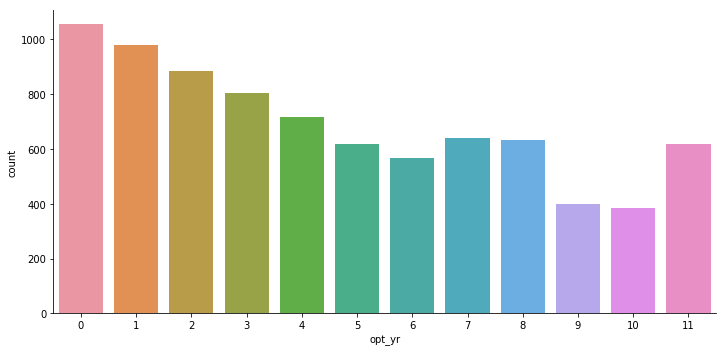

In [37]:
sns.catplot(data=df2, x='opt_yr',  kind='count', aspect=2)

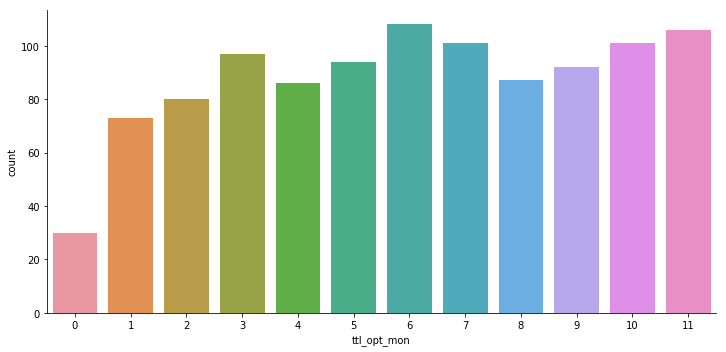

In [564]:
sns.catplot(data=df2[df2.opt_yr<1], x='ttl_opt_mon',kind="count", aspect=2)

### Graph 2:  Restaurants Survival Rate  - by operating periods
<i>“3 years” is the critical point for running restaurants (survival rate:~55%); survival rate increases significantly afterwards (3 to 8 years: 65~75%; 8+ years: 80%+)</i>
<i> </i>

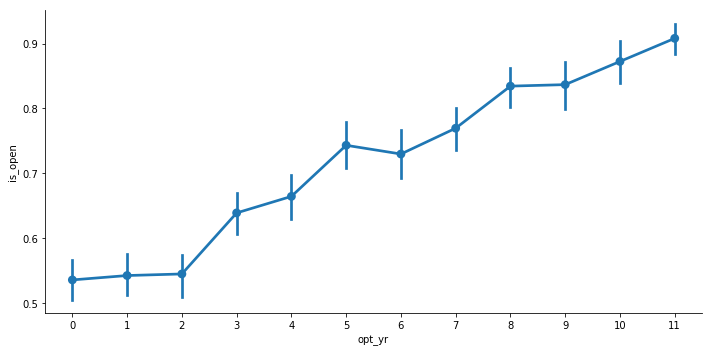

In [38]:
sns.catplot(data=df2, x='opt_yr', y='is_open', kind="point", aspect=2)

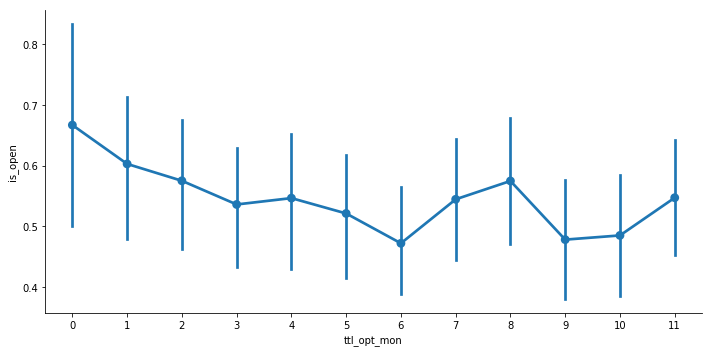

In [563]:
sns.catplot(data=df2[df2.opt_yr<1], x='ttl_opt_mon', y='is_open', kind="point", aspect=2)

### Graph 3: Overall Stars Rating - by operating periods & open status
<i>Overall Stars rating matters for restaurants under 3 years. </i>
<i> </i>

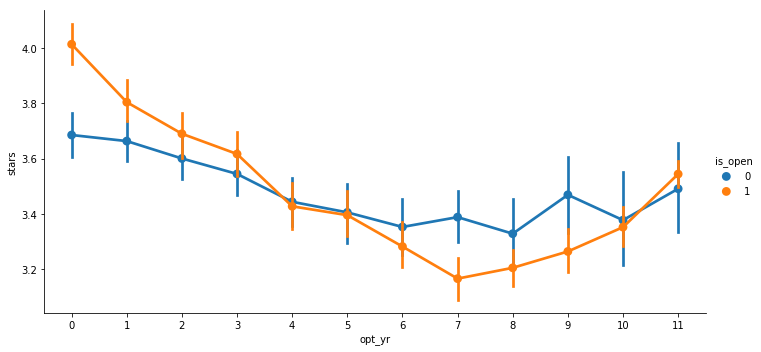

In [39]:
sns.catplot(data=df2, x='opt_yr',y='stars',hue='is_open',kind='point',aspect=2)

We can see the majority of star rating are over 3 stars

For stars over 3, the survival rate change fits intuitivety; however, for the survival rate for stars less than 3 is counter-intuitive, need further sentiment analysis to investigat. (suspect it might be due to the objectivity of the reviews.)

### Graph 4: Total Review Counts - by operating periods & open status
<i>Total reviews count still matters for restaurants within 8 years.</i>
<i> </i>

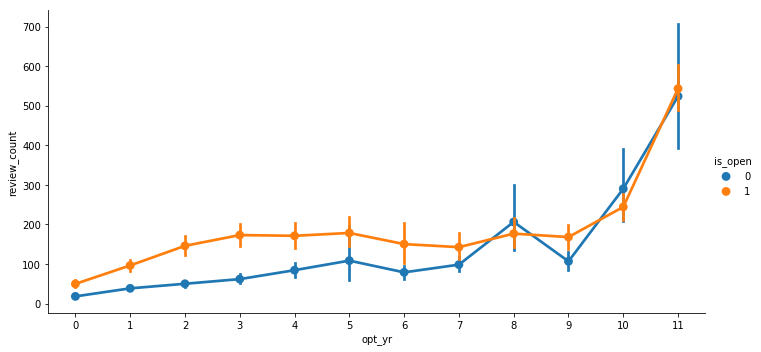

In [105]:
sns.catplot(data=df2, x='opt_yr',y='review_count',hue='is_open',kind='point',aspect=2)

# 4. Machine Learning & Validation

Detected the finding by training the following decision trees with "is_open" as target attribute. 

## 4-1. Mid-Aged Rerstaurants ( 5 to 7 years)

### 1) Subset data & deal with NaN

In [1209]:
df = LV[(LV.opt_yr>=5) & (LV.opt_yr<=7)]

In [1210]:
for i in df.columns:
    if ('star' in i ) == True:
        df[i].fillna(0, inplace=True)

In [1211]:
# fill NaN
na_list = df.isna().sum()>0
for i in na_list[na_list == True].index:
    df[i].fillna(df[i].mean(), inplace=True)

In [1212]:
(df.isna().sum() > 0).sum()

0

In [1213]:
len(df)

1827

### 2) Decision Tree

In [758]:
import sklearn as sk
import sklearn.tree as tree
from IPython.display import Image  
import pydotplus

import warnings
warnings.filterwarnings('ignore')

In [1214]:
X = df.drop(columns={'business_id','is_open'})
Y = df.is_open

In [1215]:
dt = tree.DecisionTreeClassifier(max_depth=3)

In [1216]:
dt.fit(X,Y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

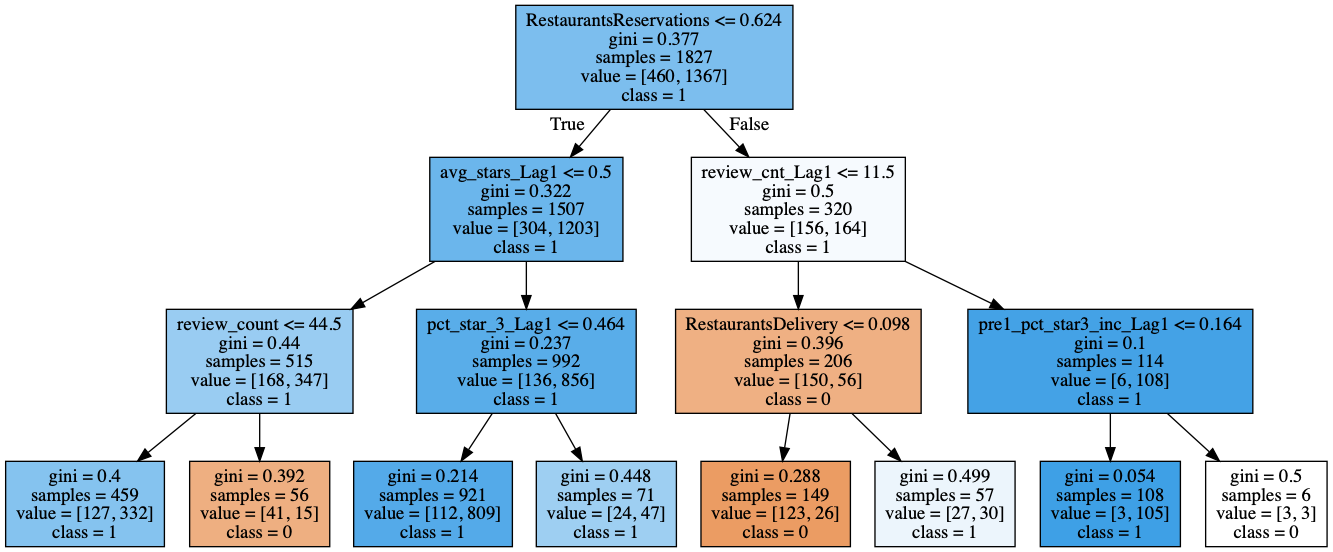

In [1217]:
# This code will visualize a decision tree dt, trained with the attributes in X and the class labels in Y
dt_feature_names = list(X.columns)
dt_target_names = np.array(Y.unique(),dtype=np.str) 
tree.export_graphviz(dt, out_file='tree.dot', 
    feature_names=dt_feature_names, class_names=dt_target_names,
    filled=True)  
graph = pydotplus.graph_from_dot_file('tree.dot')
Image(graph.create_png())

In [1191]:
df.groupby('is_open').size()

is_open
0     460
1    1367
dtype: int64

### 3) Validation


average survival rate

In [1192]:
df.is_open.mean()

0.7482211275314724

In [40]:
df['bin_review_cnt_Lag1'] = pd.cut(df.review_cnt_Lag1, bins=[0,10.616,999])
df['bin_Reservation'] = pd.cut(df.RestaurantsReservations, bins=[0,0.64,1])
df['bin_Delivery'] = pd.cut(df.RestaurantsDelivery, bins=[0,0.111,1])

### First Split: Reservation Service
<i>If a restaurant offer reservation service, then it's less likely to survive. </i>
<i> </i>

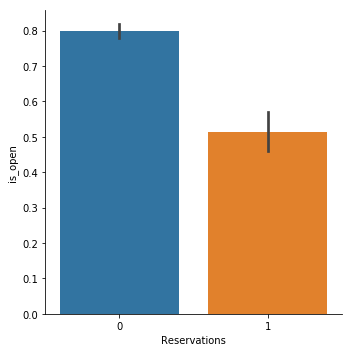

In [1195]:
df['Reservations'] = (df.RestaurantsReservations>0.624)*1
sns.catplot(data=df, x='Reservations', y='is_open', kind='bar', aspect=1)

### First Split: Review Counts in Previous Quarter 
<i>If a restaurant's review counts in previous quarter is <11, then it's less likely to survive. </i>
<i> </i>

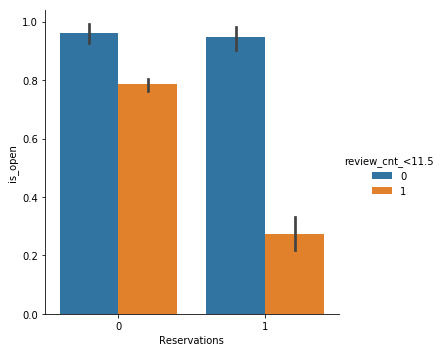

In [1196]:
df['review_cnt_<11.5'] = (df.review_cnt_Lag1<11.5)*1
sns.catplot(data=df, hue='review_cnt_<11.5', x='Reservations', y='is_open', kind='bar', aspect=1)

### Third Split: Delivery Service  (within previous quarter review counts <11.5)
<i>Restaurants which offers reservation service generally has lower survival rate; moreover, if they don't offer delivery service, they are less likely to survive. </i>
<i> </i>

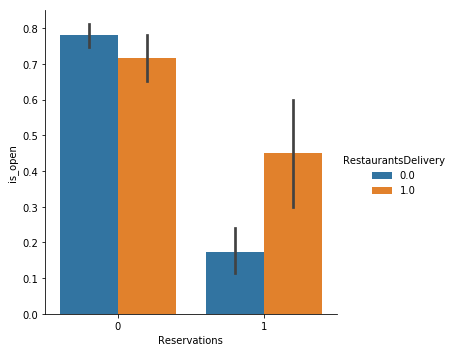

In [1199]:
sns.catplot(data=df[(df.review_cnt_Lag1<=11.5)&((df.RestaurantsDelivery==0)|(df.RestaurantsDelivery==1))], \
            x='Reservations', y='is_open',hue='RestaurantsDelivery', kind='bar', aspect=1)

## 4-1. Mid-Young Rerstaurants ( 3 to 4 years)

### 1) Subset data & deal with NaN

In [1156]:
df = LV[(LV.opt_yr>=3) & (LV.opt_yr<=4)]

In [1157]:
for i in df.columns:
    if ('star' in i ) == True:
        df[i].fillna(0, inplace=True)

In [1158]:
# fill NaN
na_list = df.isna().sum()>0
for i in na_list[na_list == True].index:
    df[i].fillna(df[i].mean(), inplace=True)

In [1159]:
(df.isna().sum() > 0).sum()

0

In [1160]:
len(df)

1521

### 2) Decision Tree

In [500]:
import sklearn as sk
import sklearn.tree as tree
from IPython.display import Image  
import pydotplus

import warnings
warnings.filterwarnings('ignore')

In [1161]:
X = df.drop(columns={'business_id','is_open'})
Y = df.is_open

In [1162]:
dt = tree.DecisionTreeClassifier(max_depth=3)

In [1163]:
dt.fit(X,Y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

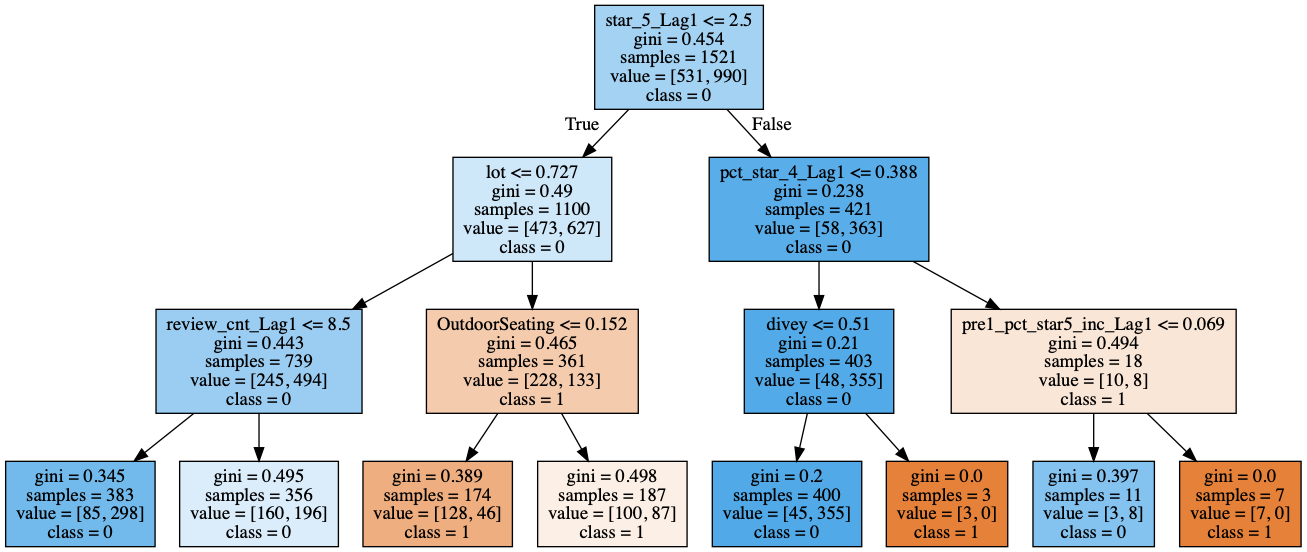

In [1164]:
# This code will visualize a decision tree dt, trained with the attributes in X and the class labels in Y
dt_feature_names = list(X.columns)
dt_target_names = np.array(Y.unique(),dtype=np.str) 
tree.export_graphviz(dt, out_file='tree.dot', 
    feature_names=dt_feature_names, class_names=dt_target_names,
    filled=True)  
graph = pydotplus.graph_from_dot_file('tree.dot')
Image(graph.create_png())

In [1103]:
df['pct_star_4_Lag1'].fillna(0, inplace=True)

In [1165]:
df.groupby('is_open').size()

is_open
0    531
1    990
dtype: int64

### 3) Validation


average survival rate

In [1166]:
df.is_open.mean()

0.650887573964497

### First Split: Five-star Elite Review Count in Previous Quarter
<i>Restaurants which receive less than 9 five-star elite reviews in previous quarter, they are less likely to survive. </i>
<i> </i>

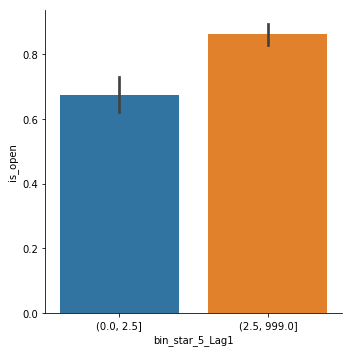

In [1167]:
df['bin_star_5_Lag1'] = pd.cut(df.star_5_Lag1, bins=[0,2.5,999])
sns.catplot(data=df, x='bin_star_5_Lag1', y='is_open', kind='bar', aspect=1)

### Second Split: Parking lot (among restaurants with less than 2.5 five-star elite reviews in previous quarter)
<i>If the restaurants offer parking lot, they are less likely to survive. </i>
<i> </i>

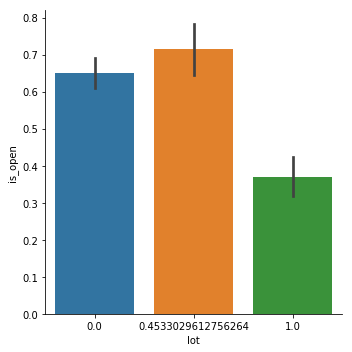

In [1169]:
sns.catplot(data=df[df.star_5_Lag1<=2.5], x='lot', y='is_open', kind='bar', aspect=1)

### Third Split: Outdoor Seating (among restaurants with less than 2.5 five-star elite reviews in previous quarter)
<i>If the restaurants don't offer outdoor seating, they are less likely to survive. </i>
<i> </i>

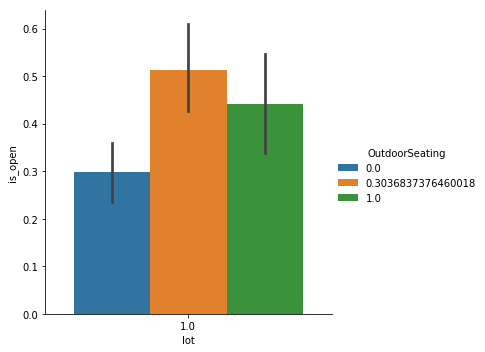

In [1171]:
sns.catplot(data=df[(df.star_5_Lag1<=3.5)&(df.lot==1)], x='lot', y='is_open', \
            hue='OutdoorSeating', kind='bar', aspect=1)

## 4-3. Young Rerstaurants ( 0 to 2 years)

### 1) Subset data & deal with NaN

In [1142]:
#df = LV[(LV.ttl_opt_mon/12<3) & (LV.ttl_opt_mon>=3)]
df = LV[(LV.ttl_opt_mon/12<3)]

### 3) Validation


In [1143]:
for i in df.columns:
    if ('star' in i ) == True:
        df[i].fillna(0, inplace=True)

average survival rate

In [1144]:
# fill NaN
na_list = df.isna().sum()>0
for i in na_list[na_list == True].index:
    df[i].fillna(df[i].mean(), inplace=True)

In [1152]:
df.is_open.mean()

0.5405960945529291

In [1145]:
(df.isna().sum() > 0).sum()

0

In [1146]:
len(df)

2919

In [919]:
#df.corr().is_open.sort_values()

### 2) Decision Tree

In [920]:
import sklearn as sk
import sklearn.tree as tree
from IPython.display import Image  
import pydotplus

import warnings
warnings.filterwarnings('ignore')

In [1147]:
X = df.drop(columns={'business_id','is_open'})
Y = df.is_open

In [1148]:
dt = tree.DecisionTreeClassifier(max_depth=3)

In [1149]:
dt.fit(X,Y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

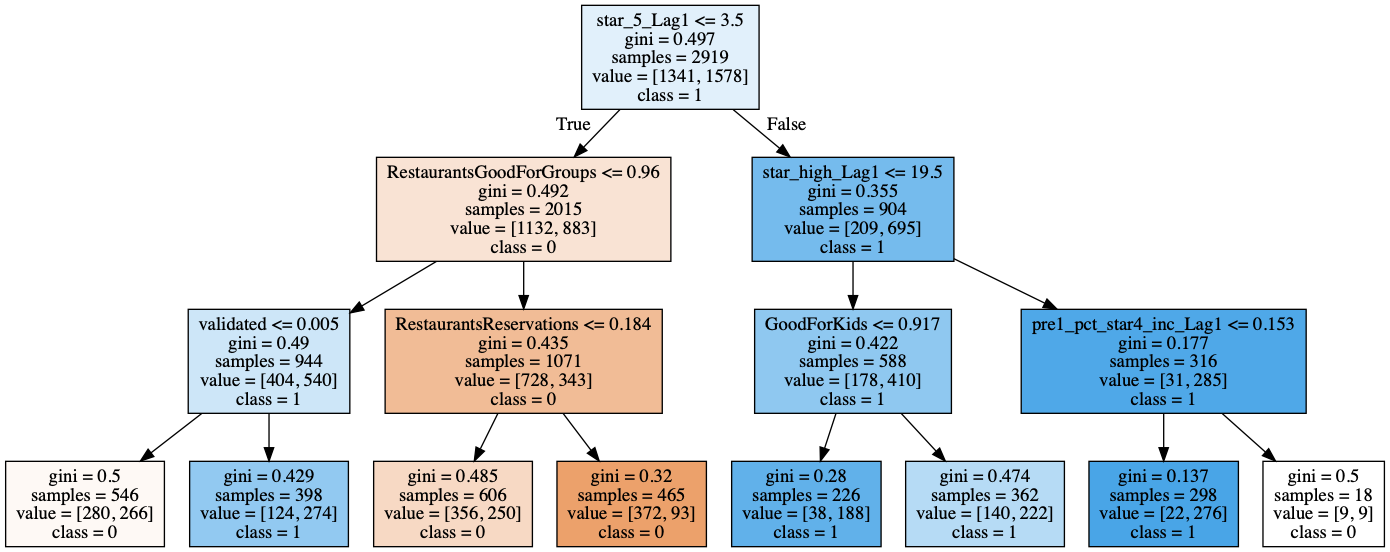

In [1150]:
# This code will visualize a decision tree dt, trained with the attributes in X and the class labels in Y
dt_feature_names = list(X.columns)
dt_target_names = np.array(Y.unique(),dtype=np.str) 
tree.export_graphviz(dt, out_file='tree.dot', 
    feature_names=dt_feature_names, class_names=dt_target_names,
    filled=True)  
graph = pydotplus.graph_from_dot_file('tree.dot')
Image(graph.create_png())

In [1151]:
df.groupby('is_open').size()

is_open
0    1341
1    1578
dtype: int64

### 3) Validation


average survival rate

In [1152]:
df.is_open.mean()

0.5405960945529291

### First Split: Five-star Elite Review Count in Previous Quarter
<i>Restaurants which receive less than 9 five-star elite reviews in previous quarter, they are less likely to survive. </i>
<i> </i>

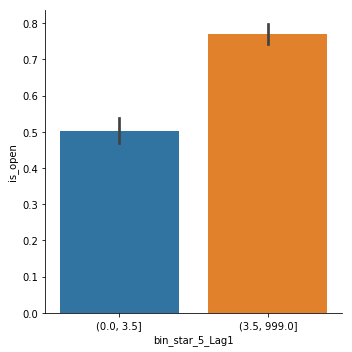

In [1153]:
df['bin_star_5_Lag1'] = pd.cut(df.star_5_Lag1, bins=[0,3.5,999])
sns.catplot(data=df, x='bin_star_5_Lag1', y='is_open', kind='bar', aspect=1)

### Second Split: Good For Groups (among restaurants with less than 3.5 five-star elite reviews in previous quarter)
<i>If the restaurants are good for groups, they are less likely to survive. </i>
<i> </i>

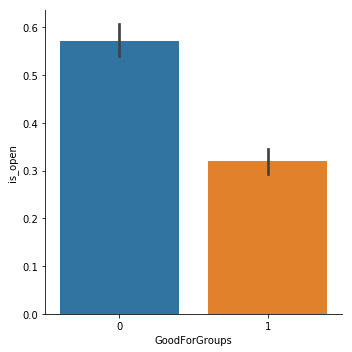

In [1154]:
df['GoodForGroups'] = (df.RestaurantsGoodForGroups==1)*1
sns.catplot(data=df[df.star_5_Lag1<=3.5], x='GoodForGroups', y='is_open', kind='bar', aspect=1)

### Third Split: Reservation Service (among restaurants with less than 3.5 five-star elite reviews in previous quarter)
<i>If the restaurants offer reservation service, they are less likely to survive. </i>
<i> </i>

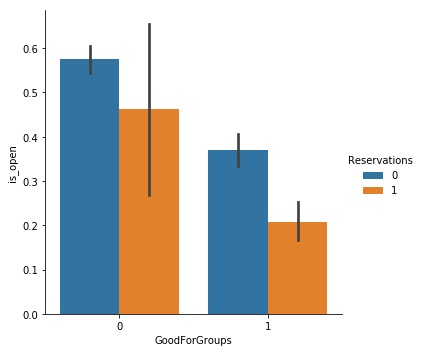

In [1155]:
df['GoodForGroups'] = (df.RestaurantsGoodForGroups==1)*1
df['Reservations'] = (df.RestaurantsReservations==1)*1
sns.catplot(data=df[df.star_5_Lag1<=3.5], x='GoodForGroups', y='is_open', hue='Reservations', kind='bar', aspect=1)

## 4-4. Old Rerstaurants ( 8+ years)

### 1) Subset data & deal with NaN

In [1046]:
df = LV[(LV.ttl_opt_mon/12>=8)]

In [1038]:
for i in df.columns:
    if ('star' in i ) == True:
        df[i].fillna(0, inplace=True)

In [1047]:
# fill NaN
na_list = df.isna().sum()>0
for i in na_list[na_list == True].index:
    df[i].fillna(df[i].mean(), inplace=True)

In [1040]:
(df.isna().sum() > 0).sum()

0

In [1041]:
len(df)

2036

In [881]:
#df.corr().is_open.sort_values()

### 2) Decision Tree

In [866]:
import sklearn as sk
import sklearn.tree as tree
from IPython.display import Image  
import pydotplus

import warnings
warnings.filterwarnings('ignore')

In [1048]:
#X = df.drop(columns={'business_id','is_open','review_count','star_elt_3_Lag1','star_2_Lag1','pct_star_4_Lag1',\
#                     'pct_star_3_Lag1'})
X = df.drop(columns={'business_id','is_open'})
Y = df.is_open

In [1049]:
dt = tree.DecisionTreeClassifier(max_depth=3)

In [1050]:
dt.fit(X,Y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

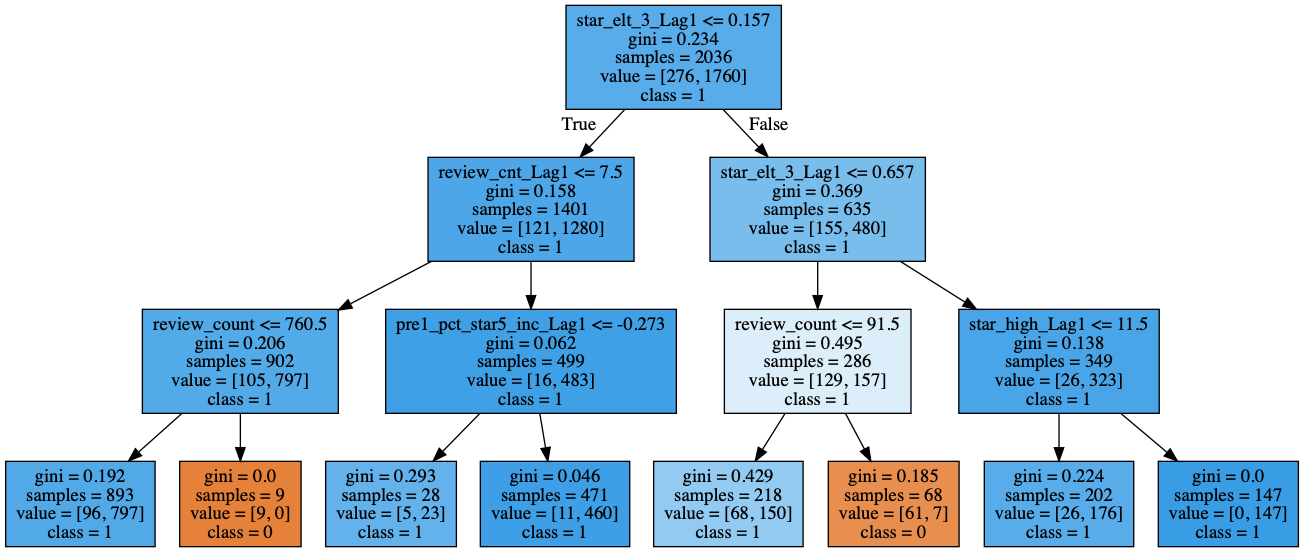

In [1051]:
# This code will visualize a decision tree dt, trained with the attributes in X and the class labels in Y
dt_feature_names = list(X.columns)
dt_target_names = np.array(Y.unique(),dtype=np.str) 
tree.export_graphviz(dt, out_file='tree.dot', 
    feature_names=dt_feature_names, class_names=dt_target_names,
    filled=True)  
graph = pydotplus.graph_from_dot_file('tree.dot')
Image(graph.create_png())

In [886]:
df.groupby('is_open').size()

is_open
0     276
1    1760
dtype: int64

## Across all segments

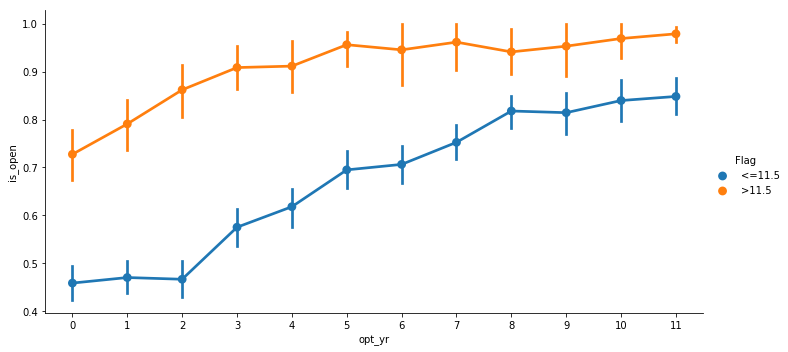

In [1183]:
# review_cnt_Lag1
df2.review_cnt_Lag1.fillna(0,inplace=True)
df2['Flag'] = df2['review_cnt_Lag1'].apply(lambda x: 'null' if str(x)=='NaN' else '<=11.5' if x<=11.5 else '>11.5' )
sns.catplot(data=df2, x='opt_yr',y='is_open', hue='Flag',kind='point',aspect=2)

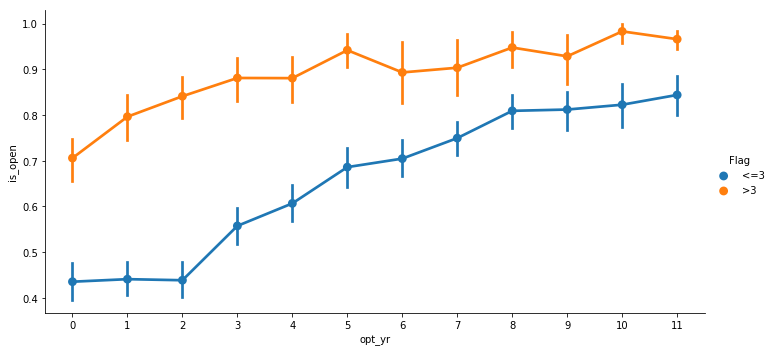

In [1184]:
# star_5_Lag1
df2.star_5_Lag1.fillna(0,inplace=True)
df2['Flag'] = df2['star_5_Lag1'].apply(lambda x: '<=3' if x<=3 else '>3' )
sns.catplot(data=df2, x='opt_yr',y='is_open', hue='Flag',kind='point',aspect=2)

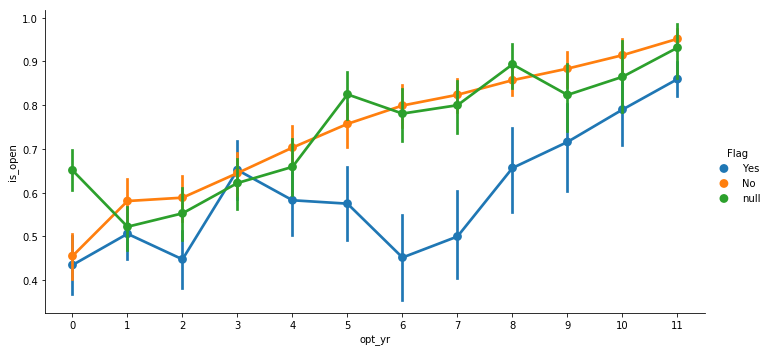

In [1185]:
# Reservations
df2['Flag'] = df2['RestaurantsReservations'].apply(lambda x: 'Yes' if x==1 else 'No' if x==0 else 'null')
sns.catplot(data=df2, x='opt_yr',y='is_open', hue='Flag',kind='point',aspect=2)

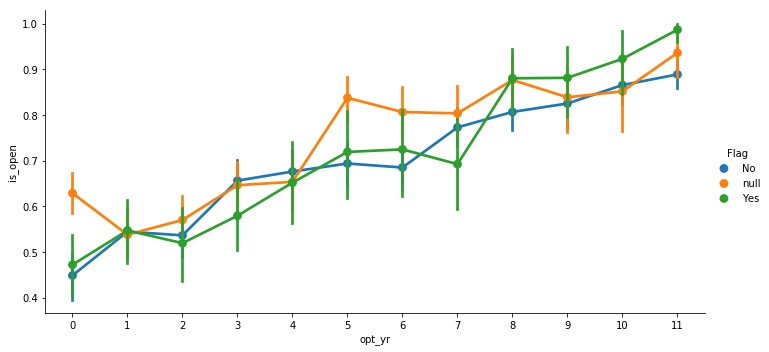

In [1187]:
# Delivery
df2['Flag'] = df2['RestaurantsDelivery'].apply(lambda x: 'Yes' if x==1 else 'No' if x==0 else 'null')
sns.catplot(data=df2, x='opt_yr',y='is_open', hue='Flag',kind='point',aspect=2)

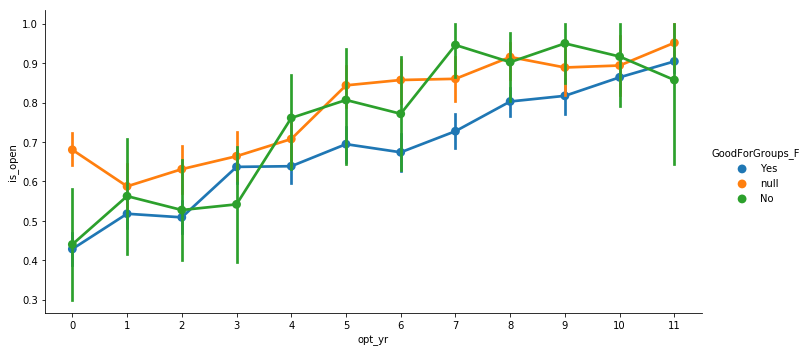

In [1186]:
# GoodForGroups
df2['GoodForGroups_F'] = df2['RestaurantsGoodForGroups'].apply(lambda x: 'Yes' if x==1 else 'No' if x==0 else 'null')
sns.catplot(data=df2, x='opt_yr',y='is_open', hue='GoodForGroups_F',kind='point',aspect=2)

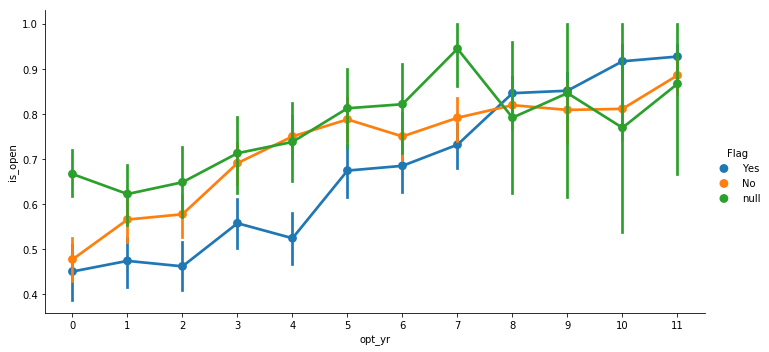

In [1188]:
# lot
df2['Flag'] = df2['lot'].apply(lambda x: 'Yes' if x==1 else 'No' if x==0 else 'null')
sns.catplot(data=df2, x='opt_yr',y='is_open', hue='Flag',kind='point',aspect=2)

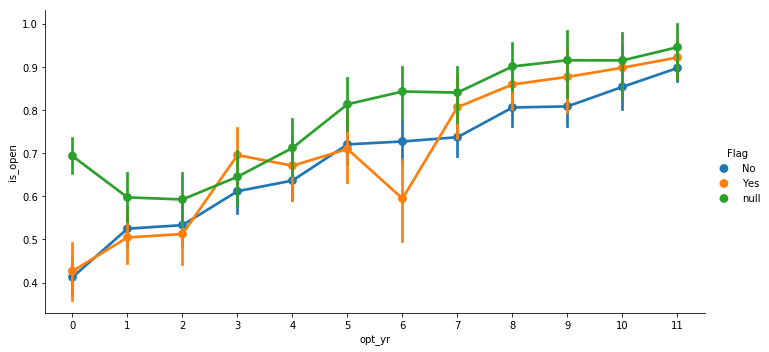

In [1189]:
# OutdoorSeating
df2['Flag'] = df2['OutdoorSeating'].apply(lambda x: 'Yes' if x==1 else 'No' if x==0 else 'null')
sns.catplot(data=df2, x='opt_yr',y='is_open', hue='Flag',kind='point',aspect=2)

# 5. Managerial Insights

<u><strong> Mid Aged Restaurants (3-8 years)<strong></u>
    
<strong>Insights :</strong> If a restaurant's review counts in the previous quarter is <11, then it's less likely to survive.
Among restaurants whose review counts in previous quarter is <11, if they offer reservation service, they are less likely to survive; moreover, if they don't offer delivery service, they are the least likely to survive.


<strong>Recommendation :</strong> 1) to offer delivery service or drop reservation service for restaurants that have less than 11 reviews in the previous quarter. 


<u><strong> Young Restaurants (0-3 years)<strong></u>
    
<strong>Insights :</strong> If a business receives less than 9 previous five-star elite reviews, then this business is less likely to survive. 
Within these restaurants, if they are good for groups, then they are less likely to survive. 
There are a few reasonings why we believe "GoodForGroups" are less likely to survive. 
One possibility is they have low turnover rate, because these groups might stay for longer periods of time.


<strong>Recommendation :</strong> 1) Young restaurants should continue to improve their high star ratings especially from Elite members. 2) Investigate why being good for groups leads to less likelihood to survive and resolve that issue.

